# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### 데이터 읽어오기


In [2]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  1                  OK   
1        3KPM0016-2                  1                  OK   
2        4E1X9167-1                  1                  OK   
3        3K1X0057-1                  1                  OK   
4        3HPM0007-1                  1                  OK   
...             ...                ...                 ...   
40501    3J1XF434-2                  1                  OK   
40502    4E1XC796-1                  1                  OK   
40503    4C1XD438-1                  1                  OK   
40504    3I1XA258-1                  1                  OK   
40505    3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
40501                                NaN                                  NaN   
40502                                NaN                                  NaN   
40503                                NaN                                  NaN   
40504                                NaN                                  NaN   
40505                                NaN                                  NaN   

       ...  Production Qty Collect Result_Fill2  \
0      ...                                    7   
1      ...                                  185   
2      ...                                   10   
3      ...                                  268   
4      ...                                  121   
...    ...                                  ...   
40501  ...                                  318   
40502  ...                                   14   
40503  ...                                    1   
40504  ...                                  117   
40505  ...                                  320   

       Production Qty Unit Time_Fill2  Production Qty Judge Value_Fill2  \
0                                 NaN                               NaN   
1                                 N

In [3]:
# Drop columns with more than half of the values missing
drop_cols = []
for column in train_data.columns:
    if (train_data[column].notnull().sum() // 2) < train_data[
        column
    ].isnull().sum():
        drop_cols.append(column)
train_data = train_data.drop(drop_cols, axis=1)

train_data

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  1                  OK   
1        3KPM0016-2                  1                  OK   
2        4E1X9167-1                  1                  OK   
3        3K1X0057-1                  1                  OK   
4        3HPM0007-1                  1                  OK   
...             ...                ...                 ...   
40501    3J1XF434-2                  1                  OK   
40502    4E1XC796-1                  1                  OK   
40503    4C1XD438-1                  1                  OK   
40504    3I1XA258-1                  1                  OK   
40505    3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                         2.5   
2                                        12.5   
3                                        12.5   
4                                         2.5   
...                                       ...   
40501                                     2.5   
40502                                    12.5   
40503                                     2.5   
40504                                    12.5   
40505                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  ...  \
0                                         -90  ...   
1                                         -90  ...   
2                                          90  ...   
3                                          90  ...   
4                                         -90  ...   
...                                       ...  ...   
40501                                     -90  ...   
40502                                      90  ...   
40503                                     -90  ...   
40504                                      90  ...   
40505                                     -90  ...   

       Head Clean Position Z Collect Result_Fill2  \
0                                            50.0   
1                                            91.8   
2                                            50.0   
3                                            91.8   
4                                            91.8   
...                                           ...   
40501                                        91.8   
40502                                        50.0   
40503                                        50.0   
405

In [4]:
# 각 열의 NaN 값 개수 계산
nan_counts = train_data.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      12766
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    12766
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    12766
dtype: int64

In [5]:
# 각 열의 NaN 값이 있는 행을 표시
nan_dam = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull()
nan_fill1 = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isnull()
nan_fill2 = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isnull()

# 세 열의 NaN 값이 모두 같은 행에서 발생했는지 확인
nan_same_rows = nan_dam & nan_fill1 & nan_fill2

# NaN 값이 동일한 행의 개수 확인
num_same_nan_rows = nan_same_rows.sum()

# 결과 출력
print(f"세 열에서 NaN 값이 동일한 행의 개수: {num_same_nan_rows}")
print(f"세 열에서 NaN 값이 동일한 행:\n{train_data[nan_same_rows]}")

세 열에서 NaN 값이 동일한 행의 개수: 12766
세 열에서 NaN 값이 동일한 행:
      Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
12         IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
13         IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
18         IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
24         IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334507   
...            ...               ...               ...              ...   
40485      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40491      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40492      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40500      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   

       Workorder_Dam  Insp. Seq No._Dam Insp Judg

In [6]:
# 열 목록을 정의
required_columns = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'
]

# 존재하는 열들만 필터링
existing_columns = [col for col in required_columns if col in train_data.columns]

# 존재하는 열들 출력
print("존재하는 열들:", existing_columns)

존재하는 열들: []


In [7]:
# Model.Suffix의 값이 공정에 따라 같은지 다른지 비교할 열 리스트
suffix_columns = [
    'Model.Suffix_Dam',
    'Model.Suffix_Fill1',
    'Model.Suffix_Fill2',
    'Model.Suffix_AutoClave'
]

# 각 행에 대해 모든 비교 열의 값이 동일한지 확인
all_equal = train_data[suffix_columns].nunique(axis=1) == 1

# 동일한 값을 가진 행만 필터링하여 네 개의 열만 선택
equal_rows = train_data.loc[all_equal, suffix_columns]

# 동일한 값을 가진 행의 개수와 결과 출력
print(f"동일한 값을 가진 행의 개수: {len(equal_rows)}")
print(equal_rows)

동일한 값을 가진 행의 개수: 40506
      Model.Suffix_Dam Model.Suffix_Fill1 Model.Suffix_Fill2  \
0          AJX75334505        AJX75334505        AJX75334505   
1          AJX75334505        AJX75334505        AJX75334505   
2          AJX75334501        AJX75334501        AJX75334501   
3          AJX75334501        AJX75334501        AJX75334501   
4          AJX75334501        AJX75334501        AJX75334501   
...                ...                ...                ...   
40501      AJX75334501        AJX75334501        AJX75334501   
40502      AJX75334501        AJX75334501        AJX75334501   
40503      AJX75334501        AJX75334501        AJX75334501   
40504      AJX75334501        AJX75334501        AJX75334501   
40505      AJX75334501        AJX75334501        AJX75334501   

      Model.Suffix_AutoClave  
0                AJX75334505  
1                AJX75334505  
2                AJX75334501  
3                AJX75334501  
4                AJX75334501  
...                   

In [8]:
# Workorder의 값이 공정에 따라 같은지 다른지 비교할 열 리스트
suffix_columns = [
    'Workorder_Dam',
    'Workorder_Fill1',
    'Workorder_Fill2',
    'Workorder_AutoClave'
]

# 각 행에 대해 모든 비교 열의 값이 동일한지 확인
all_equal = train_data[suffix_columns].nunique(axis=1) == 1

# 동일한 값을 가진 행만 필터링하여 네 개의 열만 선택
equal_rows = train_data.loc[all_equal, suffix_columns]

# 동일한 값을 가진 행의 개수와 결과 출력
print(f"동일한 값을 가진 행의 개수: {len(equal_rows)}")
print(equal_rows)

동일한 값을 가진 행의 개수: 40506
      Workorder_Dam Workorder_Fill1 Workorder_Fill2 Workorder_AutoClave
0        4F1XA938-1      4F1XA938-1      4F1XA938-1          4F1XA938-1
1        3KPM0016-2      3KPM0016-2      3KPM0016-2          3KPM0016-2
2        4E1X9167-1      4E1X9167-1      4E1X9167-1          4E1X9167-1
3        3K1X0057-1      3K1X0057-1      3K1X0057-1          3K1X0057-1
4        3HPM0007-1      3HPM0007-1      3HPM0007-1          3HPM0007-1
...             ...             ...             ...                 ...
40501    3J1XF434-2      3J1XF434-2      3J1XF434-2          3J1XF434-2
40502    4E1XC796-1      4E1XC796-1      4E1XC796-1          4E1XC796-1
40503    4C1XD438-1      4C1XD438-1      4C1XD438-1          4C1XD438-1
40504    3I1XA258-1      3I1XA258-1      3I1XA258-1          3I1XA258-1
40505    3G1XA501-1      3G1XA501-1      3G1XA501-1          3G1XA501-1

[40506 rows x 4 columns]


In [9]:
# 삭제할 열 리스트
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave'
]

# 열 삭제
train_data = train_data.drop(columns=columns_to_drop)

# 열 이름 변경
train_data = train_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

train_data

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1  AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1  AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2  AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2  AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1  AJX75334501   
...            ...               ...               ...          ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1  AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2  AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1  AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2  AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1  AJX75334501   

        Workorder  Insp. Seq No._Dam Insp Judge Code_Dam  \
0      4F1XA938-1                  1                  OK   
1      3KPM0016-2                  1                  OK   
2      4E1X9167-1                  1                  OK   
3      3K1X0057-1                  1                  OK   
4      3HPM0007-1                  1                  OK   
...           ...                ...                 ...   
40501  3J1XF434-2                  1                  OK   
40502  4E1XC796-1                  1                  OK   
40503  4C1XD438-1                  1                  OK   
40504  3I1XA258-1                  1                  OK   
40505  3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                         2.5   
2                                        12.5   
3                                        12.5   
4                                         2.5   
...                                       ...   
40501                                     2.5   
40502                                    12.5   
40503                                     2.5   
40504                                    12.5   
40505                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  ...  \
0                                         -90  ...   
1                                         -90  ...   
2                                          90  ...   
3                                          90  ...   
4                                         -90  ...   
...                                       ...  ...   
40501                                     -90  ...   
40502                                      90  ...   
40503                                     -90  ...   
40504                                      90  ...   
40505                                     -90  ...   

       Head Clean Position Z Collect Result_Fill2  \
0                                            50.0   
1                                            91.8   
2                                            50.0   
3                                            91.8   
4                                            91.8   
...                                           ...   
40501                                        91.8   
40502                                        50.0   
40503                                        50.0   
40504                                        91.8   
40505                 

In [10]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: train_data[col].iloc[0] for col in train_data.columns if train_data[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
train_data = train_data.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

train_data

삭제된 열의 개수: 35
삭제된 열과 값:
Wip Line_Dam: IVI-OB6
Process Desc._Dam: Dam Dispenser
Insp. Seq No._Dam: 1
Insp Judge Code_Dam: OK
CURE STANDBY POSITION X Collect Result_Dam: 1150
CURE STANDBY POSITION Z Collect Result_Dam: 33.5
CURE STANDBY POSITION Θ Collect Result_Dam: 0
CURE START POSITION Z Collect Result_Dam: 33.5
Wip Line_AutoClave: IVI-OB6
Process Desc._AutoClave: Auto Clave Out
Equipment_AutoClave: Auto Clave Out
Insp. Seq No._AutoClave: 1
Insp Judge Code_AutoClave: OK
1st Pressure Judge Value_AutoClave: OK
2nd Pressure Judge Value_AutoClave: OK
3rd Pressure Judge Value_AutoClave: OK
Wip Line_Fill1: IVI-OB6
Process Desc._Fill1: Fill1 Dispenser
Insp. Seq No._Fill1: 1
Insp Judge Code_Fill1: OK
Wip Line_Fill2: IVI-OB6
Process Desc._Fill2: Fill2 Dispenser
Insp. Seq No._Fill2: 1
Insp Judge Code_Fill2: OK
CURE END POSITION Θ Collect Result_Fill2: -90
CURE STANDBY POSITION X Collect Result_Fill2: 1020
CURE STANDBY POSITION Θ Collect Result_Fill2: 0
CURE START POSITION Θ Collect Result_Fill2

Equipment_Dam Model.Suffix   Workorder  \
0      Dam dispenser #1  AJX75334505  4F1XA938-1   
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
2      Dam dispenser #2  AJX75334501  4E1X9167-1   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
...                 ...          ...         ...   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40502  Dam dispenser #2  AJX75334501  4E1XC796-1   
40503  Dam dispenser #1  AJX75334501  4C1XD438-1   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                         2.5   
2                                        12.5   
3                                        12.5   
4                                         2.5   
...                                       ...   
40501                                     2.5   
40502                                    12.5   
40503                                     2.5   
40504                                    12.5   
40505                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         -90                            100   
1                                         -90                             70   
2                                          90                             85   
3                                          90                             70   
4                                         -90                             70   
...                                       ...                            ...   
40501                                     -90                             70   
40502                                      90                            100   
40503                                     -90                            100   
40504                                      90                             70   
40505                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                          1030   
2                                           280   
3                                           280   
4                                          1030   
...                                         ...   
40501                                      1030   
40502                                       280   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                           -90   
2                                            90   
3                                            90   
4                                           -90   
...                                         ...   
40501                                       -90   
40502                                        90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SP

In [11]:
# 열 이름 정의
target_column = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 열의 값들 확인
if target_column not in train_data.columns:
    raise ValueError(f"열 '{target_column}'이(가) 데이터프레임에 없습니다.")

# 고유한 값 추출
unique_values = train_data[target_column].unique()

# 고유한 값들을 포함한 DataFrame 생성
unique_values_df = pd.DataFrame(unique_values, columns=[target_column])

# 결측치와 문자열 포함 모든 고유 값 출력
print(f"'{target_column}' 열의 고유한 값들:")
print(unique_values_df)

# 추가로 결측치와 특정 값('OK')의 존재 여부 확인
nan_count = train_data[target_column].isna().sum()
ok_count = (train_data[target_column] == 'OK').sum()

print(f"\n결측치(NaN) 개수: {nan_count}")
print(f"'OK' 값 개수: {ok_count}")

'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam' 열의 고유한 값들:
  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
0                                                NaN      
1                                              550.3      
2                                                 OK      
3                                              162.4      
4                                                549      
5                                              549.5      
6                                                550      
7                                              548.5      

결측치(NaN) 개수: 12766
'OK' 값 개수: 11293


In [12]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 열이 데이터프레임에 존재하는지 확인
if column_name not in train_data.columns:
    raise ValueError(f"열 '{column_name}'이(가) 데이터프레임에 없습니다.")

# 해당 열의 모든 값이 숫자인지 확인
has_numeric = train_data[column_name].apply(pd.to_numeric, errors='coerce').notna().any()

# 결과 출력
if has_numeric:
    print(f"열 '{column_name}'에는 숫자가 포함되어 있습니다.")
else:
    print(f"열 '{column_name}'에는 숫자가 포함되어 있지 않습니다.")


열 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'에는 숫자가 포함되어 있습니다.


In [13]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 데이터프레임에서 숫자와 숫자가 아닌 값으로 구분하여 두 개의 데이터프레임 생성
train_noshift = train_data[pd.to_numeric(train_data[column_name], errors='coerce').notna()]
train_shift = train_data[pd.to_numeric(train_data[column_name], errors='coerce').isna() | (train_data[column_name] == 'OK')]

# 결과 출력
print("숫자인 경우의 데이터프레임 (train_noshift):")
print(train_noshift)

print("\n숫자가 아닌 경우의 데이터프레임 (train_shift):")
print(train_shift)

# 결과파일 저장
# train_noshift.to_csv('train_noshift.csv', index=False)
# train_shift.to_csv('train_shift.csv', index=False)

숫자인 경우의 데이터프레임 (train_noshift):
          Equipment_Dam Model.Suffix   Workorder  \
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
5      Dam dispenser #1  AJX75334501  3G1X8297-2   
8      Dam dispenser #1  AJX75334501  3H1X9883-1   
...                 ...          ...         ...   
40497  Dam dispenser #1  AJX75334501  3H1XC952-1   
40498  Dam dispenser #1  AJX75334501  3H1X7981-1   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
1                                       240.0   
3                                      1000.0   
4                                       240.0   
5                                       240.0   
8                                       240.0   
...                                       ...   


In [14]:
# 열 이름 정의
column_fill1 = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'

# train_noshift1 및 train_shift1 데이터프레임 생성
train_noshift1 = train_data[pd.to_numeric(train_data[column_fill1], errors='coerce').notna()]
train_shift1 = train_data[pd.to_numeric(train_data[column_fill1], errors='coerce').isna() | (train_data[column_fill1] == 'OK')]

# train_shift와 train_shift1 데이터프레임이 같은지 확인
def are_dataframes_equal(df1, df2):
    return df1.equals(df2)

# train_shift와 train_shift1 비교
dataframes_equal = are_dataframes_equal(train_shift, train_shift1)

# 결과 출력
print("숫자인 경우의 데이터프레임 (train_noshift1):")
print(train_noshift1)

print("\n숫자가 아닌 경우의 데이터프레임 (train_shift1):")
print(train_shift1)

print("\ntrain_shift와 train_shift1이 같은가요?:", dataframes_equal)

숫자인 경우의 데이터프레임 (train_noshift1):
          Equipment_Dam Model.Suffix   Workorder  \
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
5      Dam dispenser #1  AJX75334501  3G1X8297-2   
8      Dam dispenser #1  AJX75334501  3H1X9883-1   
...                 ...          ...         ...   
40497  Dam dispenser #1  AJX75334501  3H1XC952-1   
40498  Dam dispenser #1  AJX75334501  3H1X7981-1   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
1                                       240.0   
3                                      1000.0   
4                                       240.0   
5                                       240.0   
8                                       240.0   
...                                       ...   

In [15]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
end_col = 'WorkMode Collect Result_Dam'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

C:\Users\박소현\AppData\Local\Temp\ipykernel_23704\2970819967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [16]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
end_col = 'WorkMode Collect Result_Fill1'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

C:\Users\박소현\AppData\Local\Temp\ipykernel_23704\3756343480.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [17]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
end_col = 'WorkMode Collect Result_Fill2'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

# 결과를 파일로 저장
# train_shift.to_csv('train_shift_corrected.csv', index=False)

C:\Users\박소현\AppData\Local\Temp\ipykernel_23704\2277645347.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [18]:
# 열 순서 출력
print("열 순서:")
for i, col in enumerate(train_shift.columns, start=1):
    print(f"{i}: {col}")

열 순서:
1: Equipment_Dam
2: Model.Suffix
3: Workorder
4: CURE END POSITION X Collect Result_Dam
5: CURE END POSITION Z Collect Result_Dam
6: CURE END POSITION Θ Collect Result_Dam
7: CURE SPEED Collect Result_Dam
8: CURE START POSITION X Collect Result_Dam
9: CURE START POSITION Θ Collect Result_Dam
10: DISCHARGED SPEED OF RESIN Collect Result_Dam
11: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
12: DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
13: DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
14: Dispense Volume(Stage1) Collect Result_Dam
15: Dispense Volume(Stage2) Collect Result_Dam
16: Dispense Volume(Stage3) Collect Result_Dam
17: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
18: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
19: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
20: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
21: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
22: HEAD NORMAL COORDINATE Y AXIS(Stag

In [19]:
# 열 순서 출력
print("열 순서:")
for i, col in enumerate(train_noshift.columns, start=1):
    print(f"{i}: {col}")

열 순서:
1: Equipment_Dam
2: Model.Suffix
3: Workorder
4: CURE END POSITION X Collect Result_Dam
5: CURE END POSITION Z Collect Result_Dam
6: CURE END POSITION Θ Collect Result_Dam
7: CURE SPEED Collect Result_Dam
8: CURE START POSITION X Collect Result_Dam
9: CURE START POSITION Θ Collect Result_Dam
10: DISCHARGED SPEED OF RESIN Collect Result_Dam
11: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
12: DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
13: DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
14: Dispense Volume(Stage1) Collect Result_Dam
15: Dispense Volume(Stage2) Collect Result_Dam
16: Dispense Volume(Stage3) Collect Result_Dam
17: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
18: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
19: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
20: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
21: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
22: HEAD NORMAL COORDINATE Y AXIS(Stag

In [20]:
# 두 데이터프레임 합치기
combined_df = pd.concat([train_shift, train_noshift], axis=0)
combined_df.reset_index(drop=True, inplace=True)

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과를 CSV 파일로 저장
# combined_df.to_csv('./data/train_shift_final.csv', index=False)

combined_df

Equipment_Dam Model.Suffix   Workorder  \
0      Dam dispenser #1  AJX75334505  4F1XA938-1   
1      Dam dispenser #2  AJX75334501  4E1X9167-1   
2      Dam dispenser #1  AJX75334501  3M1XH425-1   
3      Dam dispenser #2  AJX75334501  4A1XB542-4   
4      Dam dispenser #2  AJX75334501  4E1X9168-1   
...                 ...          ...         ...   
40501  Dam dispenser #1  AJX75334501  3H1XC952-1   
40502  Dam dispenser #1  AJX75334501  3H1X7981-1   
40503  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                      1000.0   
2                                       240.0   
3                                      1000.0   
4                                      1000.0   
...                                       ...   
40501                                   240.0   
40502                                   240.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                        12.5   
2                                         2.5   
3                                        12.5   
4                                        12.5   
...                                       ...   
40501                                     2.5   
40502                                     2.5   
40503                                     2.5   
40504                                    12.5   
40505                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         -90                            100   
1                                          90                             85   
2                                         -90                             70   
3                                          90                             70   
4                                          90                             85   
...                                       ...                            ...   
40501                                     -90                             70   
40502                                     -90                             70   
40503                                     -90                             70   
40504                                      90                             70   
40505                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SP

In [21]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: combined_df[col].iloc[0] for col in combined_df.columns if combined_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
combined_df = combined_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

combined_df

삭제된 열의 개수: 24
삭제된 열과 값:
HEAD Standby Position X Collect Result_Dam: 257.0
HEAD Standby Position Y Collect Result_Dam: 66
HEAD Standby Position Z Collect Result_Dam: 0.0
Head Clean Position X Collect Result_Dam: 127.5
Head Clean Position Y Collect Result_Dam: 66.0
Head Purge Position X Collect Result_Dam: 257.0
Head Purge Position Y Collect Result_Dam: 66.0
Head Zero Position X Collect Result_Dam: 505.0
HEAD Standby Position X Collect Result_Fill1: 289.0
HEAD Standby Position Y Collect Result_Fill1: 50
HEAD Standby Position Z Collect Result_Fill1: 0.0
Head Clean Position X Collect Result_Fill1: 123.4
Head Clean Position Y Collect Result_Fill1: 50.0
Head Clean Position Z Collect Result_Fill1: 92.2
Head Purge Position X Collect Result_Fill1: 289.0
Head Purge Position Y Collect Result_Fill1: 50
HEAD Standby Position X Collect Result_Fill2: 270.0
HEAD Standby Position Y Collect Result_Fill2: 50
HEAD Standby Position Z Collect Result_Fill2: -10
Head Clean Position X Collect Result_Fill2: 119

Equipment_Dam Model.Suffix   Workorder  \
0      Dam dispenser #1  AJX75334505  4F1XA938-1   
1      Dam dispenser #2  AJX75334501  4E1X9167-1   
2      Dam dispenser #1  AJX75334501  3M1XH425-1   
3      Dam dispenser #2  AJX75334501  4A1XB542-4   
4      Dam dispenser #2  AJX75334501  4E1X9168-1   
...                 ...          ...         ...   
40501  Dam dispenser #1  AJX75334501  3H1XC952-1   
40502  Dam dispenser #1  AJX75334501  3H1X7981-1   
40503  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                      1000.0   
2                                       240.0   
3                                      1000.0   
4                                      1000.0   
...                                       ...   
40501                                   240.0   
40502                                   240.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                        12.5   
2                                         2.5   
3                                        12.5   
4                                        12.5   
...                                       ...   
40501                                     2.5   
40502                                     2.5   
40503                                     2.5   
40504                                    12.5   
40505                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         -90                            100   
1                                          90                             85   
2                                         -90                             70   
3                                          90                             70   
4                                          90                             85   
...                                       ...                            ...   
40501                                     -90                             70   
40502                                     -90                             70   
40503                                     -90                             70   
40504                                      90                             70   
40505                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SP

In [22]:
# 각 열의 NaN 값 개수 계산
nan_counts = combined_df.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

Series([], dtype: int64)

In [23]:
# 문자열 타입인 열들의 이름과 데이터 타입 출력
string_columns = combined_df.select_dtypes(include='object')
string_columns.dtypes

Equipment_Dam                                                 object
Model.Suffix                                                  object
Workorder                                                     object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      object
Chamber Temp. Judge Value_AutoClave                           object
Equipment_Fill1                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    object
Equipment_Fill2                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    object
target                                                        object
dtype: object

In [24]:
# 변환할 열들의 리스트
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 각 열을 float로 변환
for col in columns_to_convert:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df[columns_to_convert].dtypes

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    float64
dtype: object

### 같은 값을 가지는 그룹에서 하나만 남기고 제거

In [25]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(combined_df.columns, 2):
    if combined_df[col1].equals(combined_df[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: CURE END POSITION Θ Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam
그룹: Stage1 Circle1 Distance Speed Collect Result_Dam, Stage1 Circle4 Distance Speed Collect Result_Dam, Stage1 Circle2 Distance Speed Collect Result_Dam, Stage1 Line4 Distance Speed Collect Result_Dam, Stage1 Circle3 Distance Speed Collect Result_Dam, Stage1 Line2 Distance Speed Collect Result_Dam
그룹: Stage2 Circle4 Distance Speed Collect Result_Dam, Stage2 Circle3 Distance Speed Collect Result_Dam, Stage2 Circle2 Distance Speed Collect Result_Dam, Stage2 Circle1 Distance Speed Collect Result_Dam
그룹: Stage2 Line4 Distance Speed Collect Result_Dam, Stage2 Line2 Distance Speed Collect Result_Dam
그룹: Stage3 Circle2 Distance Speed Collect Result_Dam, Stage3 Circle1 Distance Speed Collect Result_Dam, Stage3 Circle4 Di

In [26]:
# 확인하기

# 비교할 열 리스트
columns_to_compare = [
    'Stage3 Circle1 Distance Speed Collect Result_Dam',
    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam' 

]

# 선택한 열 데이터만 포함하는 데이터프레임 생성
df_comparison = combined_df[columns_to_compare]

# 모든 행에 대해 열 값이 동일한지 확인
all_rows_identical = df_comparison.nunique(axis=1).eq(1).all()

if all_rows_identical:
    print("모든 행에서 열들의 값이 동일합니다.")
else:
    print("일부 행에서 열들의 값이 동일하지 않습니다.")

모든 행에서 열들의 값이 동일합니다.


두 열의 값이 다른 행의 개수: 27

두 열의 값이 다른 행들의 'target' 열 분포:
target
Normal      19
AbNormal     8
Name: count, dtype: int64


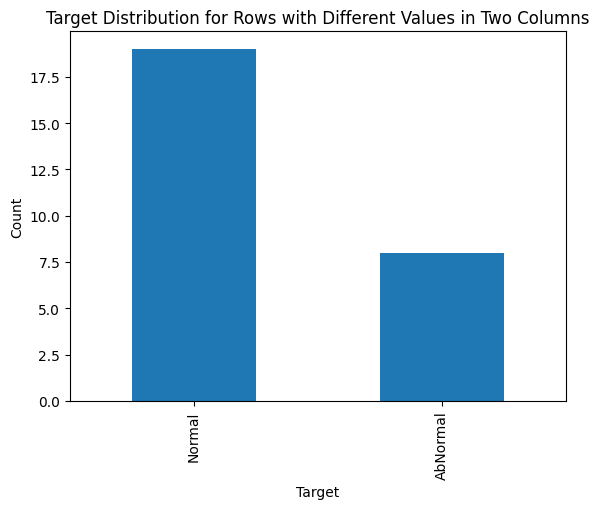

In [27]:
import matplotlib.pyplot as plt

# 두 열의 값이 다른 행을 필터링
different_rows = combined_df[
    combined_df['Stage2 Circle1 Distance Speed Collect Result_Dam'] != combined_df['Stage2 Line2 Distance Speed Collect Result_Dam']
]

# 다른 행의 개수
num_different_rows = len(different_rows)

# 필터링된 행들의 'target' 열 분포 확인
target_distribution = different_rows['target'].value_counts()

# 출력
print(f"두 열의 값이 다른 행의 개수: {num_different_rows}")
print("\n두 열의 값이 다른 행들의 'target' 열 분포:")
print(target_distribution)

# 분포 시각화
target_distribution.plot(kind='bar', title="Target Distribution for Rows with Different Values in Two Columns")
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [28]:
# 삭제할 열 목록
columns_to_drop = [
    'CURE END POSITION Θ Collect Result_Dam',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',

    'Stage1 Circle2 Distance Speed Collect Result_Dam',
    'Stage1 Circle3 Distance Speed Collect Result_Dam',
    'Stage1 Circle4 Distance Speed Collect Result_Dam',
    'Stage1 Line2 Distance Speed Collect Result_Dam',
    'Stage1 Line4 Distance Speed Collect Result_Dam',

    'Stage2 Circle2 Distance Speed Collect Result_Dam',
    'Stage2 Circle3 Distance Speed Collect Result_Dam',
    'Stage2 Circle4 Distance Speed Collect Result_Dam',

    'Stage2 Line4 Distance Speed Collect Result_Dam',

    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam',

    'CURE STANDBY POSITION Z Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
    
    'Workorder'
]

# 열 삭제
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과 확인
combined_df

Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
0      Dam dispenser #1  AJX75334505                                   240.0   
1      Dam dispenser #2  AJX75334501                                  1000.0   
2      Dam dispenser #1  AJX75334501                                   240.0   
3      Dam dispenser #2  AJX75334501                                  1000.0   
4      Dam dispenser #2  AJX75334501                                  1000.0   
...                 ...          ...                                     ...   
40501  Dam dispenser #1  AJX75334501                                   240.0   
40502  Dam dispenser #1  AJX75334501                                   240.0   
40503  Dam dispenser #1  AJX75334501                                   240.0   
40504  Dam dispenser #2  AJX75334501                                  1000.0   
40505  Dam dispenser #1  AJX75334501                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2              

In [29]:
# combined_df.to_csv('./data/train_cleaned.csv', index=False)

In [30]:
# 삭제할 열 목록 - 범주형 열 제거
columns_to_drop = [
    'Model.Suffix', 'Equipment_Dam', 'Chamber Temp. Judge Value_AutoClave',
    'Equipment_Fill1', 'Equipment_Fill2',
    
    'PalletID Collect Result_Dam', 'Receip No Collect Result_Dam',
    'PalletID Collect Result_Fill1', 'Receip No Collect Result_Fill1',
    'PalletID Collect Result_Fill2', 'Receip No Collect Result_Fill2'
]

# 열 삭제
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과 확인
combined_df

CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                      1000.0   
2                                       240.0   
3                                      1000.0   
4                                      1000.0   
...                                       ...   
40501                                   240.0   
40502                                   240.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2                                                   13.2     
3                                                   13.2     
4                                                   14.7     
...                                                  ...     
40501                                                9.7     
40502                                                9.7     
40503       

In [31]:
# combined_df.to_csv('./data/train_cleaned_no_categorical.csv', index=False)

### Normal, Abnormal 나누기

In [33]:
train_cleaned = pd.read_csv('./data/train_cleaned.csv')  # 범주형 포함

# target이 'normal'인 행만 필터링
normal = train_cleaned[train_cleaned['target'] == 'Normal']

# 필터링된 데이터프레임 크기 확인
print(f"'target'이 'normal'인 행의 개수: {len(normal)}")

# 필터링된 데이터프레임 확인 (상위 몇 개 행 출력)
# normal.to_csv('./data/normal.csv', index = False)

normal

'target'이 'normal'인 행의 개수: 38156


Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
0      Dam dispenser #1  AJX75334505                                   240.0   
1      Dam dispenser #2  AJX75334501                                  1000.0   
2      Dam dispenser #1  AJX75334501                                   240.0   
3      Dam dispenser #2  AJX75334501                                  1000.0   
4      Dam dispenser #2  AJX75334501                                  1000.0   
...                 ...          ...                                     ...   
40499  Dam dispenser #1  AJX75334501                                   240.0   
40501  Dam dispenser #1  AJX75334501                                   240.0   
40502  Dam dispenser #1  AJX75334501                                   240.0   
40503  Dam dispenser #1  AJX75334501                                   240.0   
40504  Dam dispenser #2  AJX75334501                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40499                                     2.5                             70   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40499                                      1030   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40499                                       -90   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40499                                            10   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2              

In [34]:
# target이 'Abnormal'인 행만 필터링
abnormal = train_cleaned[train_cleaned['target'] == 'AbNormal']

# 필터링된 데이터프레임 크기 확인
print(f"'target'이 'Abnormal'인 행의 개수: {len(abnormal)}")

# 필터링된 데이터프레임 확인 (상위 몇 개 행 출력)
# abnormal.to_csv('./data/abnormal.csv', index = False)

abnormal

'target'이 'Abnormal'인 행의 개수: 2350


Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
8      Dam dispenser #1  AJX75334502                                   240.0   
24     Dam dispenser #1  AJX75334505                                   240.0   
35     Dam dispenser #1  AJX75334501                                   240.0   
52     Dam dispenser #1  AJX75334501                                   240.0   
83     Dam dispenser #1  AJX75334502                                   240.0   
...                 ...          ...                                     ...   
40457  Dam dispenser #1  AJX75334501                                   240.0   
40486  Dam dispenser #1  AJX75334501                                   240.0   
40493  Dam dispenser #2  AJX75334502                                  1000.0   
40500  Dam dispenser #1  AJX75334501                                   240.0   
40505  Dam dispenser #1  AJX75334501                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
8                                         2.5                             70   
24                                        2.5                             85   
35                                        2.5                             70   
52                                        2.5                             70   
83                                        2.5                             70   
...                                       ...                            ...   
40457                                     2.5                             70   
40486                                     2.5                             70   
40493                                    12.5                             70   
40500                                     2.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
8                                          1030   
24                                         1030   
35                                         1030   
52                                         1030   
83                                         1030   
...                                         ...   
40457                                      1030   
40486                                      1030   
40493                                       280   
40500                                      1030   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
8                                           -90   
24                                          -90   
35                                          -90   
52                                          -90   
83                                          -90   
...                                         ...   
40457                                       -90   
40486                                       -90   
40493                                        90   
40500                                       -90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
8                                                16   
24                                               16   
35                                               16   
52                                               10   
83                                               16   
...                                             ...   
40457                                            10   
40486                                            10   
40493                                            10   
40500                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
8                                                   14.2     
24                                                  14.9     
35             

## 상관관계(범주형 제외)

### Normal, AbNormal 같이

In [35]:
no_category = pd.read_csv('./data/train_cleaned_no_categorical.csv')

38


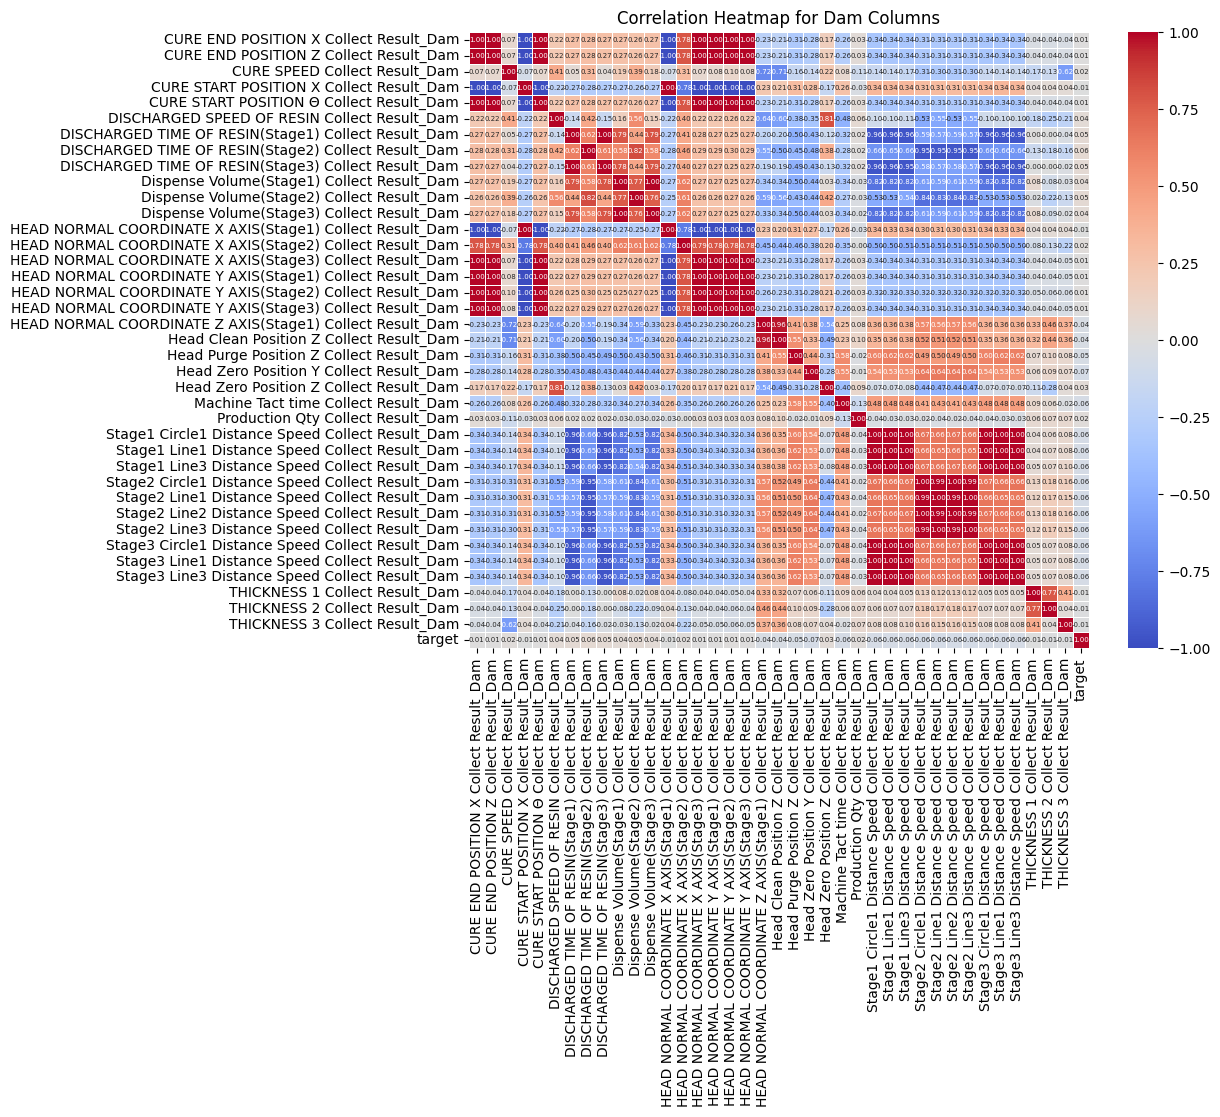

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = no_category.filter(like='Dam').copy()
print(len(dam_columns.columns))

# target 열을 1과 0으로 인코딩
dam_columns['target'] = no_category['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title('Correlation Heatmap for Dam Columns')
plt.show()

19


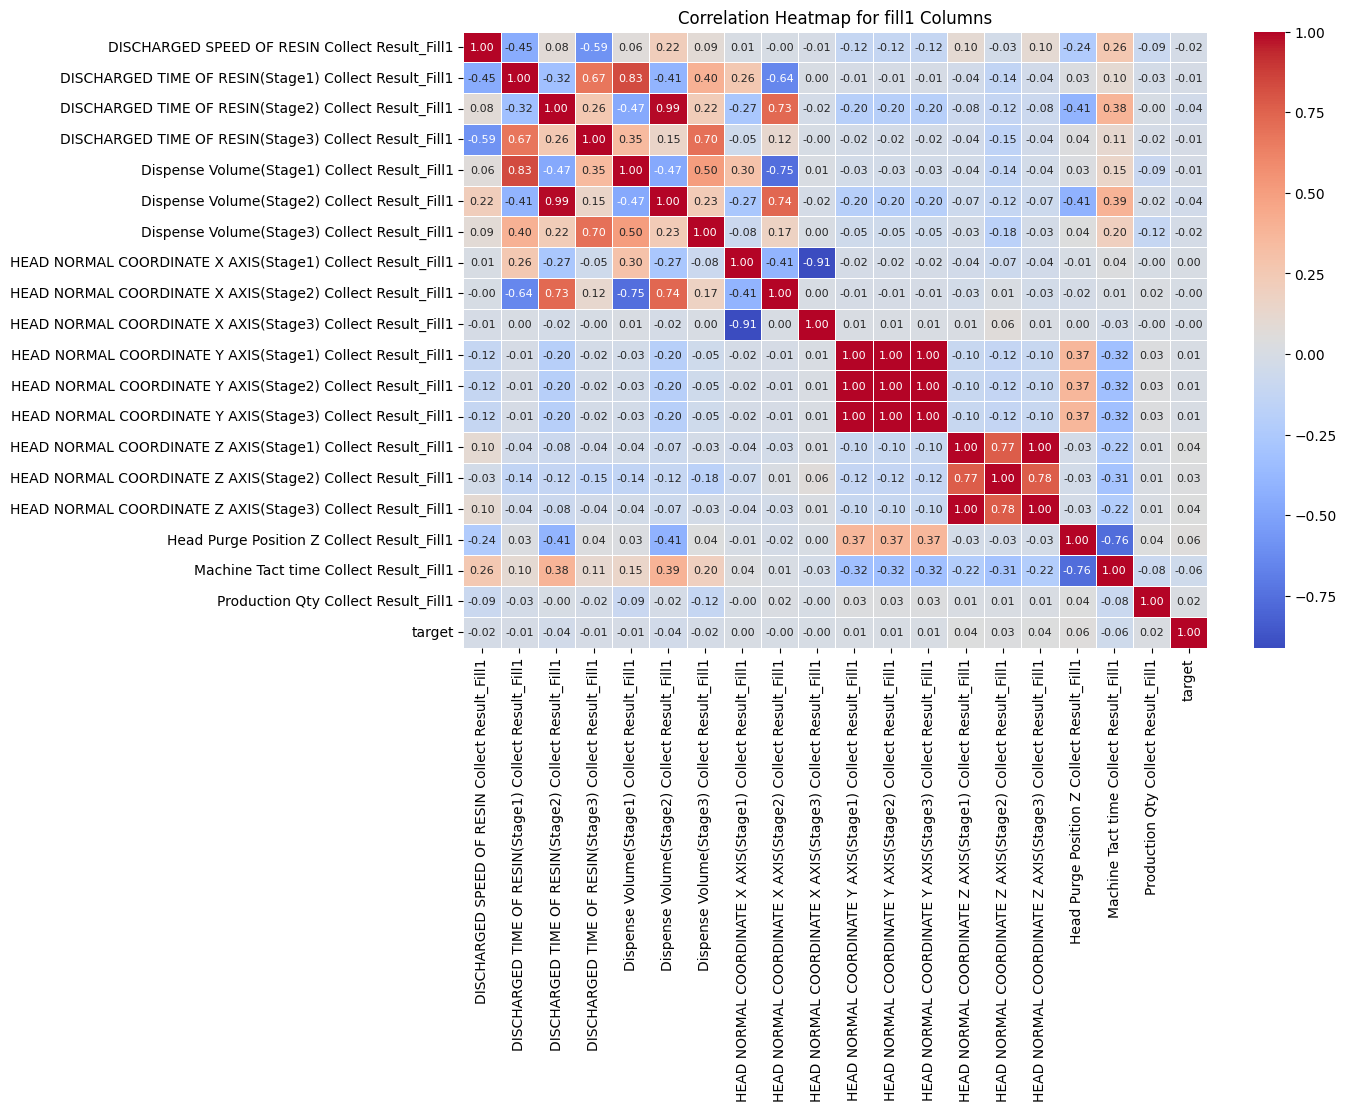

In [37]:
fill1_columns = no_category.filter(like = 'Fill1').copy()
print(len(fill1_columns.columns))

# target 열을 1과 0으로 인코딩
fill1_columns['target'] = no_category['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill1 Columns')
plt.show()

14


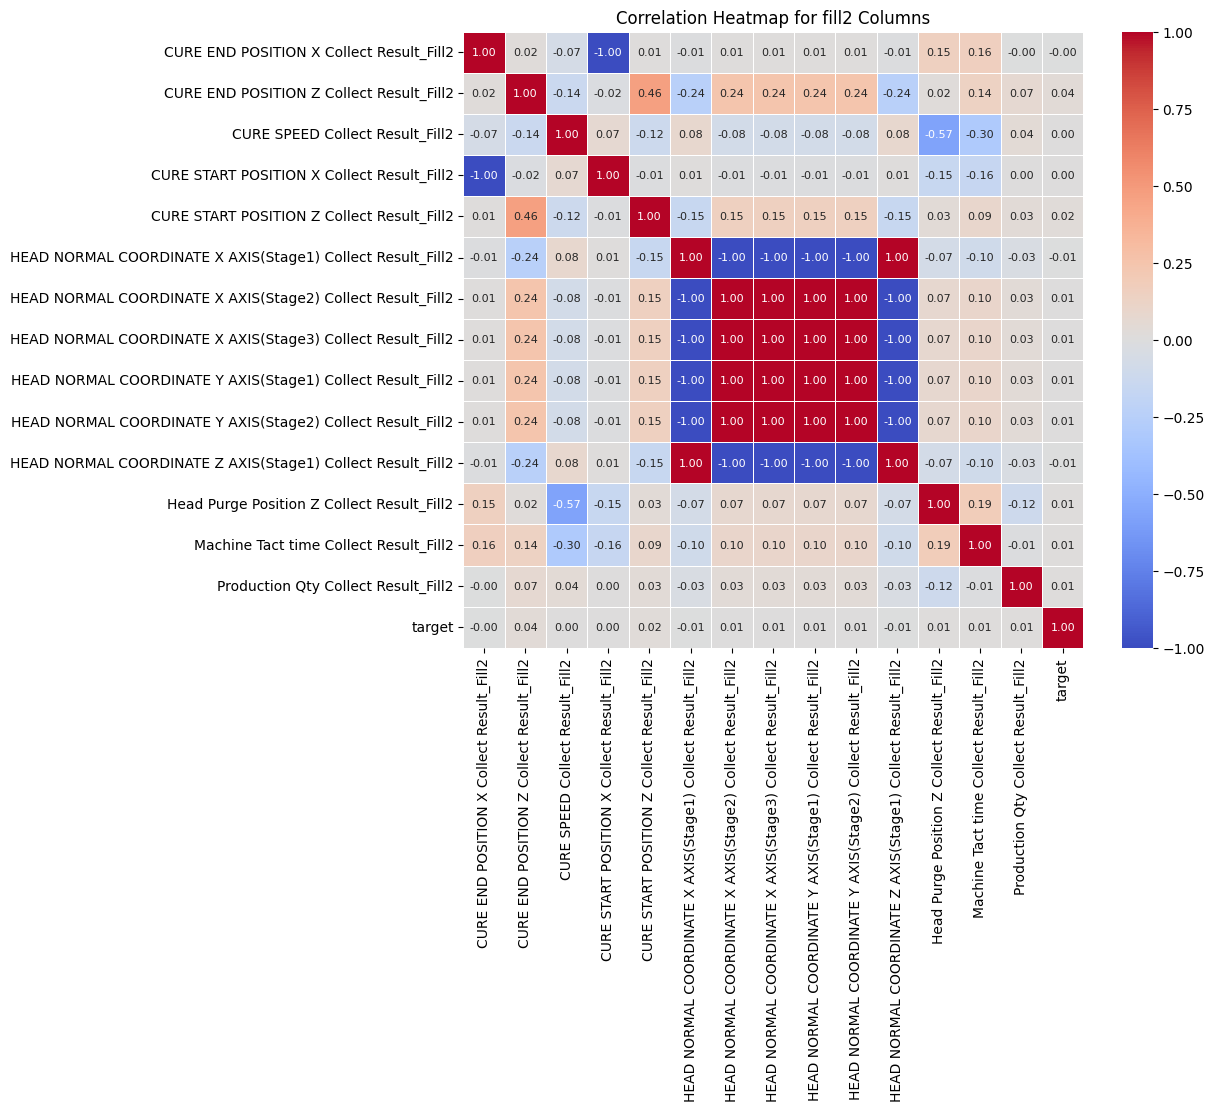

In [38]:
fill2_columns = no_category.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# target 열을 1과 0으로 인코딩
fill2_columns['target'] = no_category['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill2 Columns')
plt.show()

8


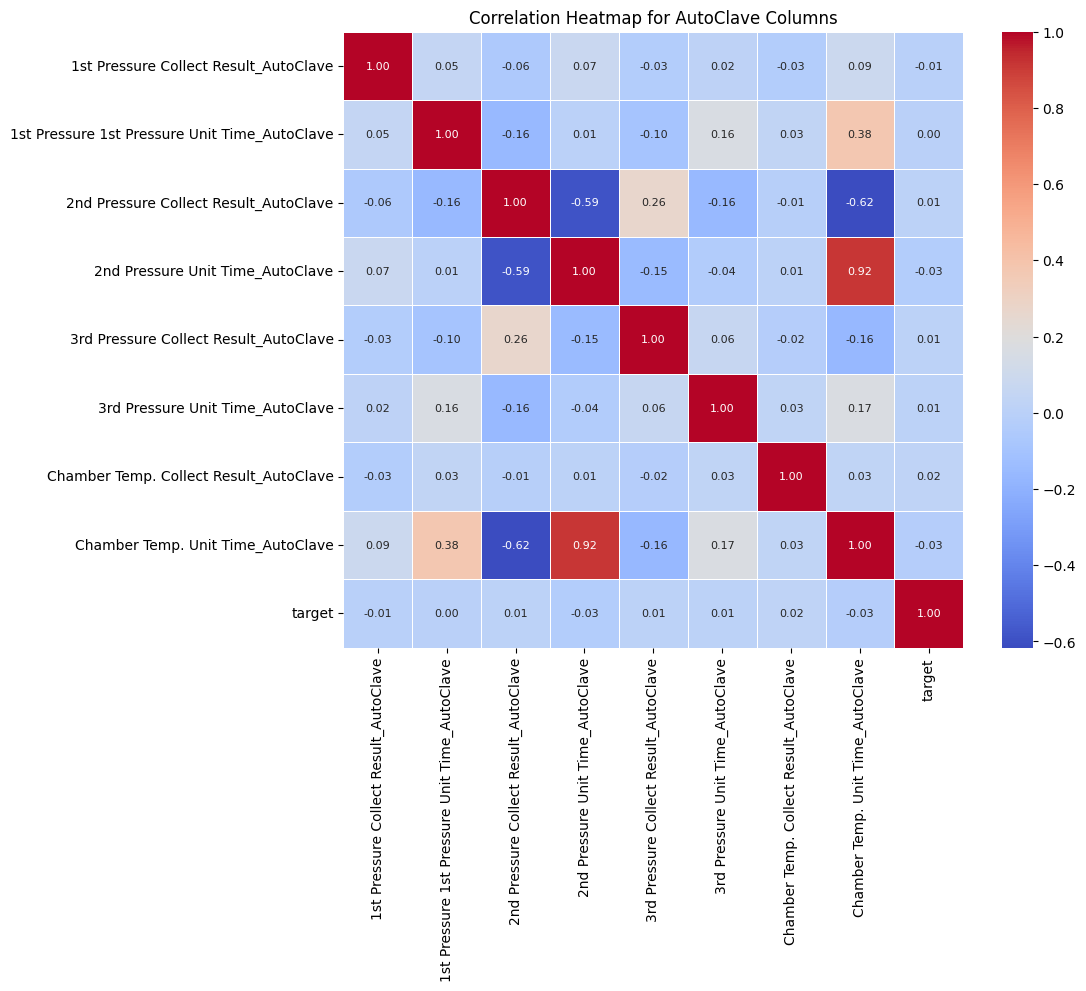

In [39]:
auto_columns = no_category.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# target 열을 1과 0으로 인코딩
auto_columns['target'] = no_category['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for AutoClave Columns')
plt.show()

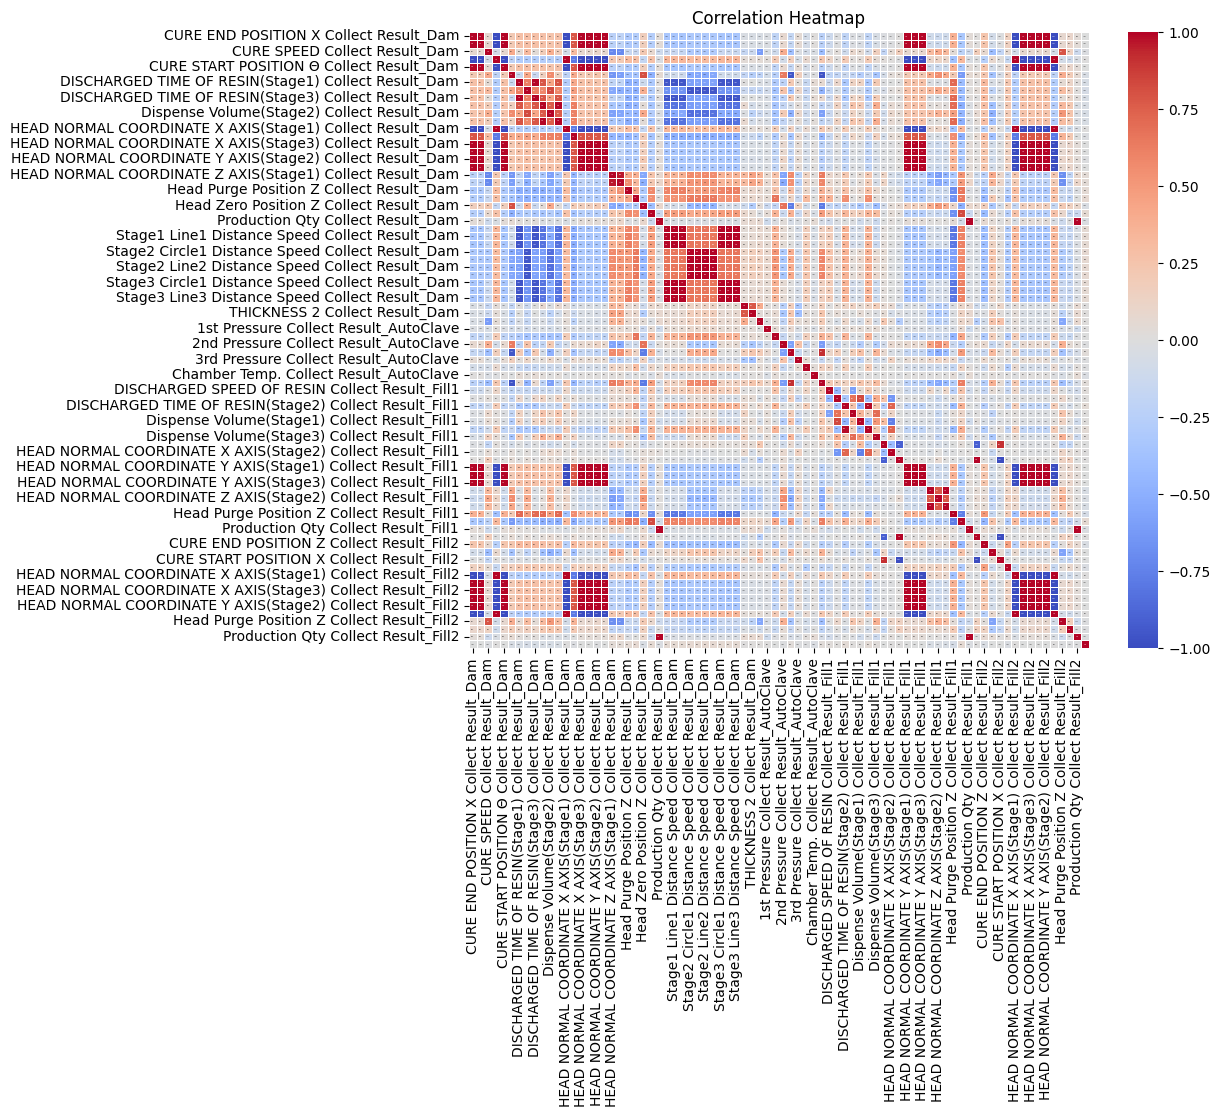

In [40]:
no_category['target'] = no_category['target'].map({'Normal': 0, 'AbNormal': 1})

# 상관관계 행렬 계산
correlation_matrix = no_category.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 1})
plt.title('Correlation Heatmap')
plt.show()

# 엥 다 안그려짐

### Normal

In [41]:
normal = pd.read_csv('./data/normal.csv')

# 삭제할 열 목록
columns_to_drop = [
    'Equipment_Dam',
    'Model.Suffix',
    'Chamber Temp. Judge Value_AutoClave',
    'Equipment_Fill1',
    'Equipment_Fill2',
    'PalletID Collect Result_Dam',
    'Receip No Collect Result_Dam',
    'PalletID Collect Result_Fill1',
    'Receip No Collect Result_Fill1',
    'PalletID Collect Result_Fill2',
    'Receip No Collect Result_Fill2'
]    

# 열 삭제
no_category_normal = normal.drop(columns=columns_to_drop)

# 결과 확인
no_category_normal

CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                      1000.0   
2                                       240.0   
3                                      1000.0   
4                                      1000.0   
...                                       ...   
38151                                   240.0   
38152                                   240.0   
38153                                   240.0   
38154                                   240.0   
38155                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
38151                                     2.5                             70   
38152                                     2.5                             70   
38153                                     2.5                             70   
38154                                     2.5                             70   
38155                                    12.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
38151                                      1030   
38152                                      1030   
38153                                      1030   
38154                                      1030   
38155                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
38151                                       -90   
38152                                       -90   
38153                                       -90   
38154                                       -90   
38155                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
38151                                            10   
38152                                            10   
38153                                            10   
38154                                            10   
38155                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2                                                   13.2     
3                                                   13.2     
4                                                   14.7     
...                                                  ...     
38151                                                9.6     
38152                                                9.7     
38153       

In [42]:
# no_category_normal.to_csv('./data/normal_no_categorical.csv', index=False)

38


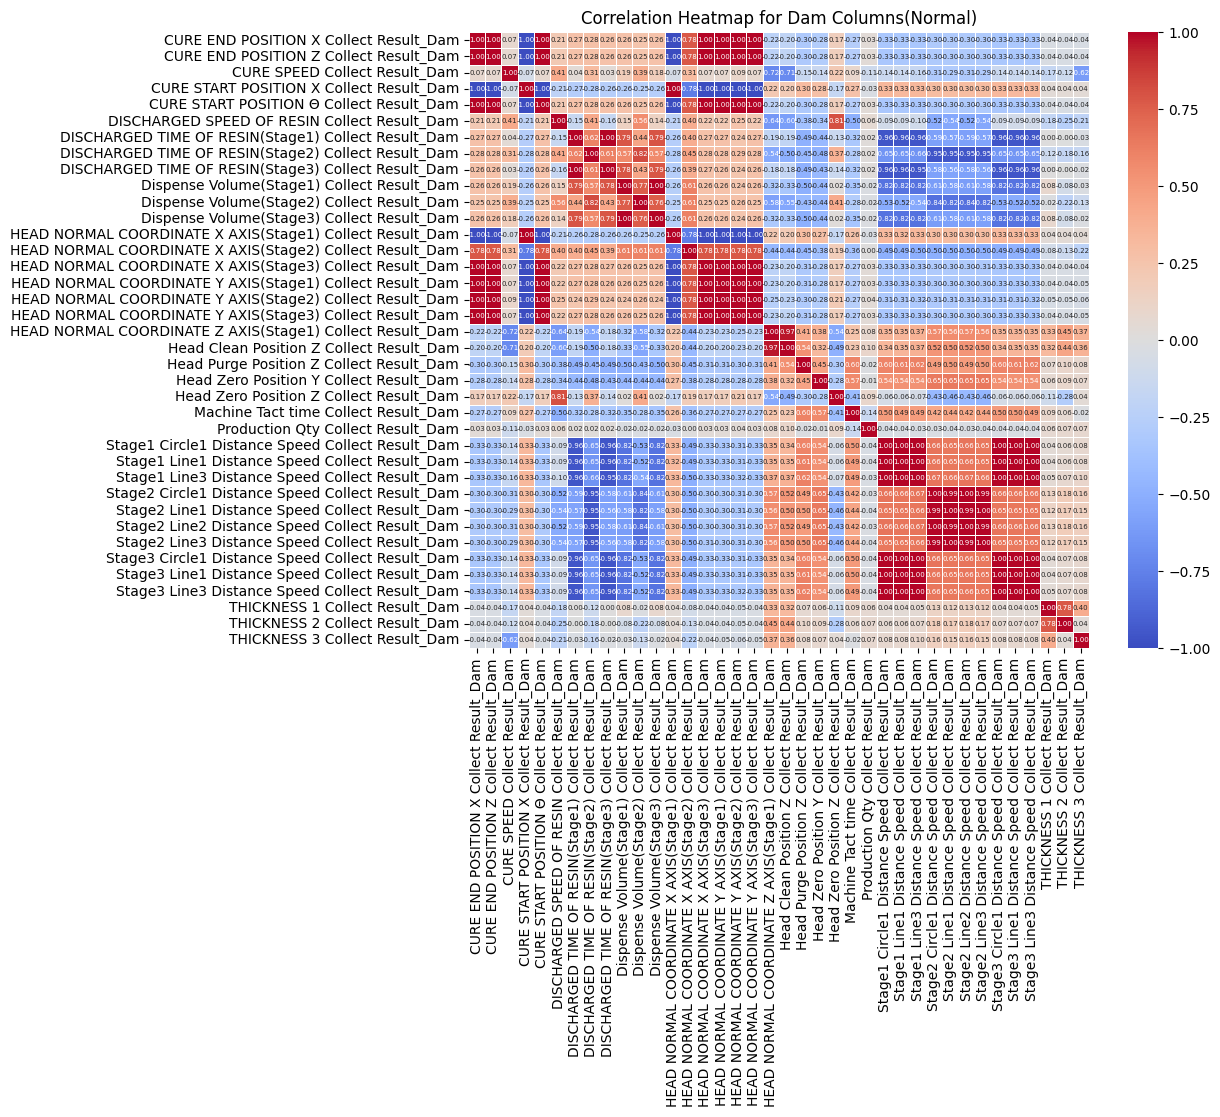

In [43]:
# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = no_category_normal.filter(like='Dam').copy()
print(len(dam_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title('Correlation Heatmap for Dam Columns(Normal)')
plt.show()

19


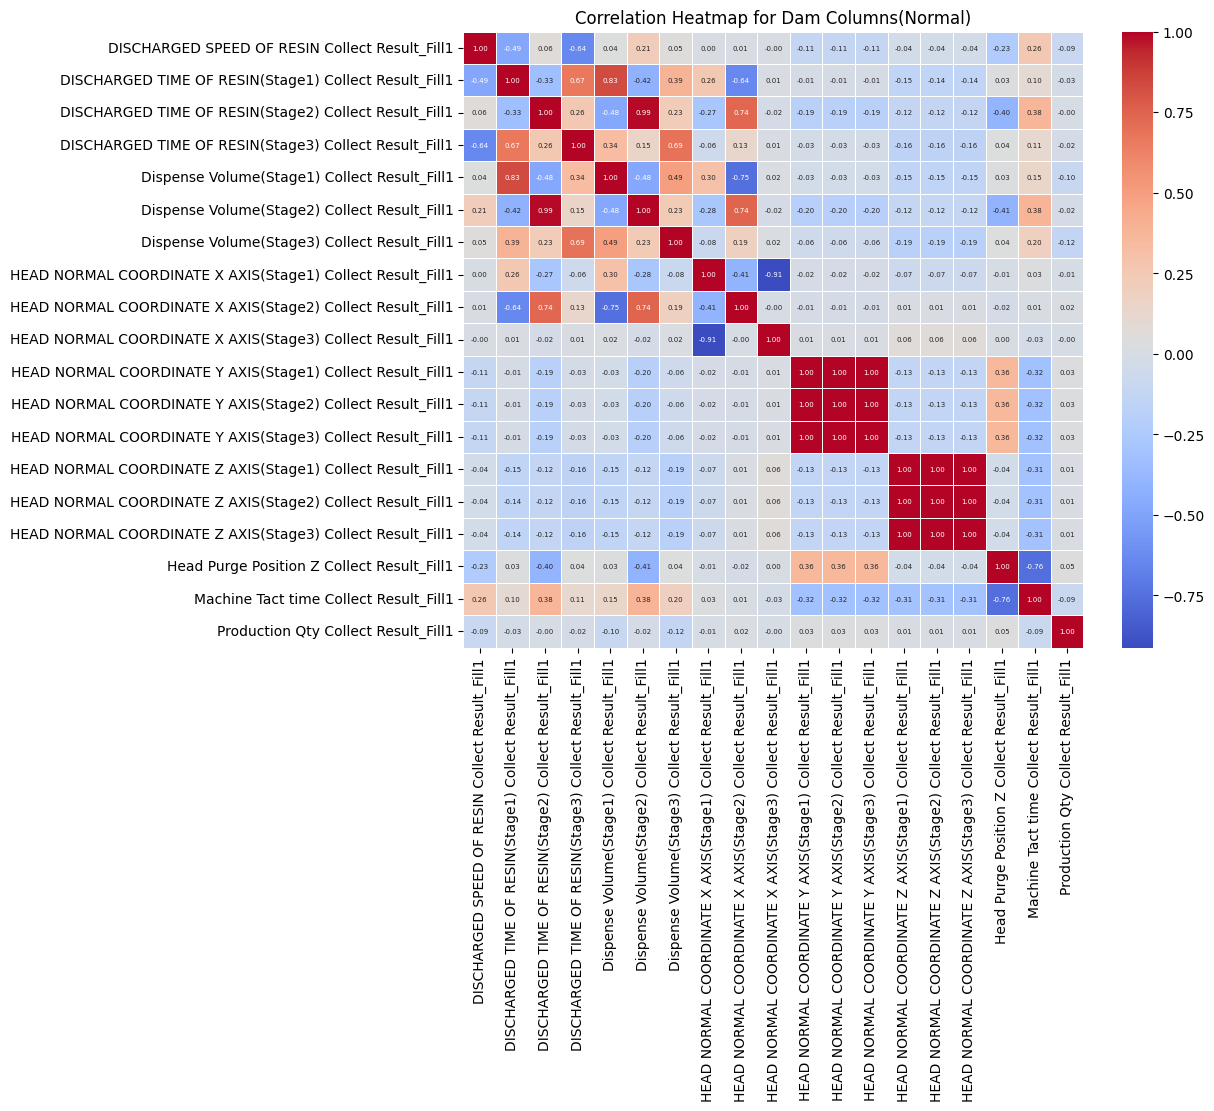

In [44]:
fill1_columns = no_category_normal.filter(like='Fill1').copy()
print(len(fill1_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title('Correlation Heatmap for Dam Columns(Normal)')
plt.show()

14


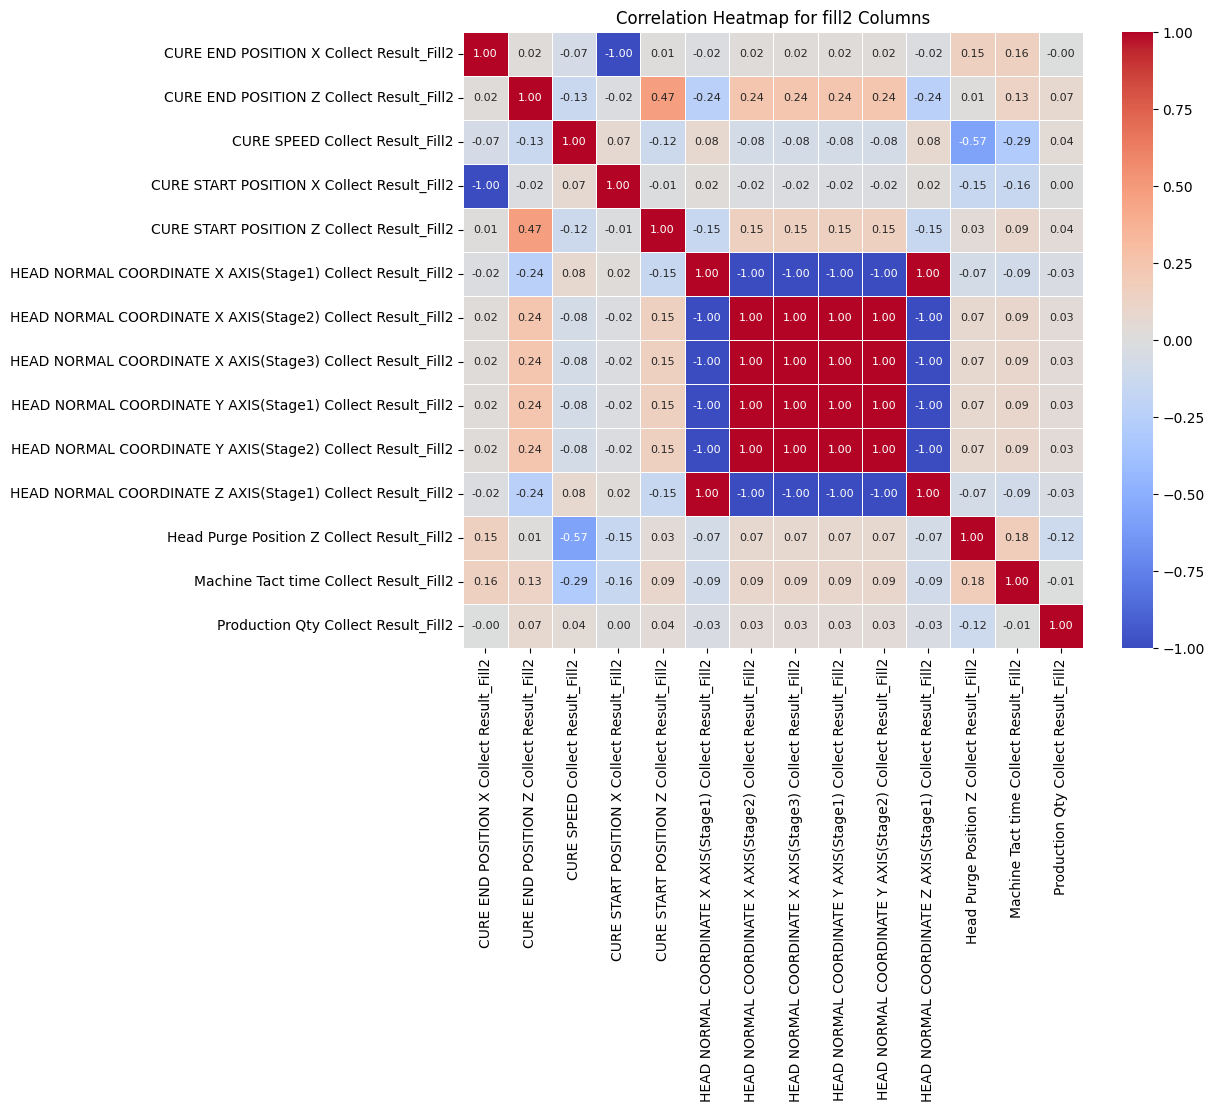

In [45]:
fill2_columns = no_category_normal.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill2 Columns')
plt.show()

8


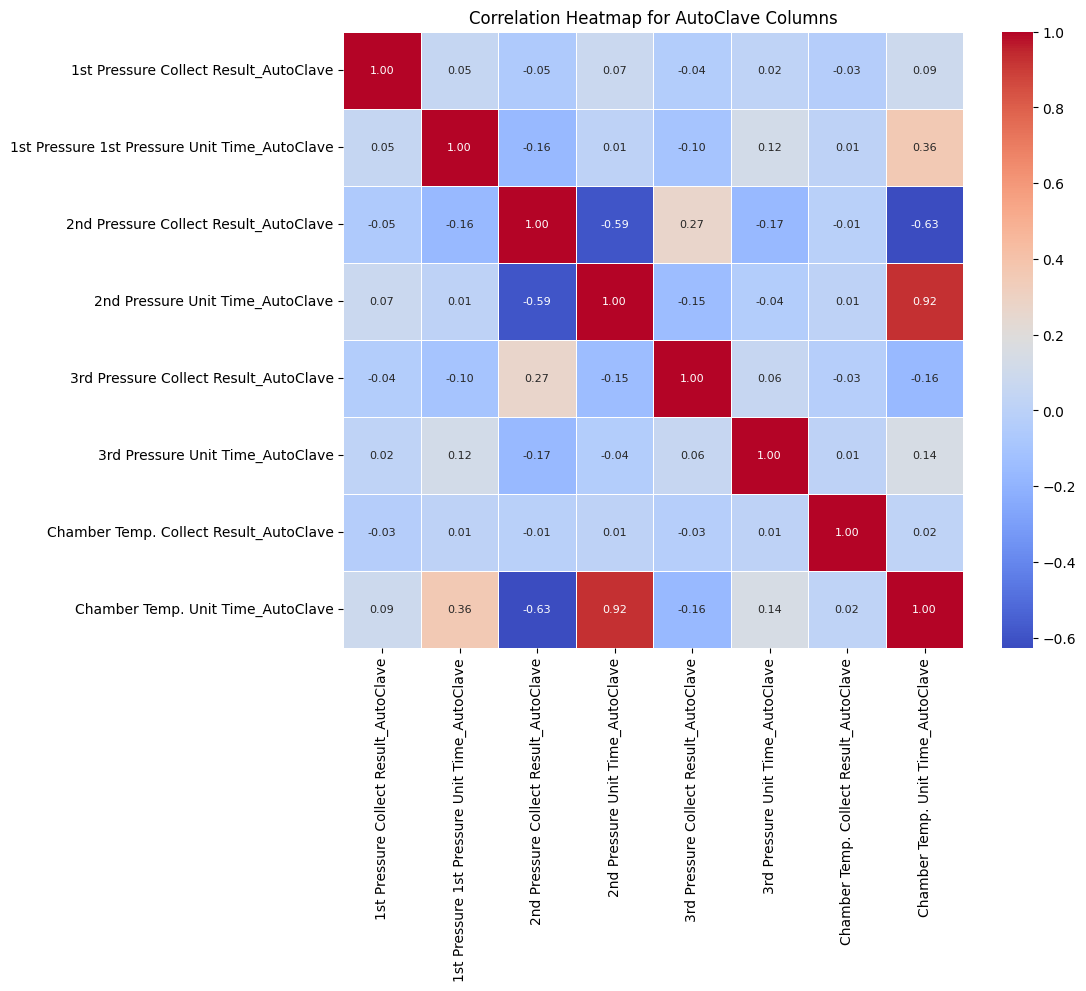

In [46]:
auto_columns = no_category_normal.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for AutoClave Columns')
plt.show()

### Abnormal

In [47]:
abnormal = pd.read_csv('./data/abnormal.csv')

# 삭제할 열 목록
columns_to_drop = [
    'Equipment_Dam',
    'Model.Suffix',
    'Chamber Temp. Judge Value_AutoClave',
    'Equipment_Fill1',
    'Equipment_Fill2',
    'PalletID Collect Result_Dam',
    'Receip No Collect Result_Dam',
    'PalletID Collect Result_Fill1',
    'Receip No Collect Result_Fill1',
    'PalletID Collect Result_Fill2',
    'Receip No Collect Result_Fill2'
]    

# 열 삭제
no_category_abnormal = abnormal.drop(columns=columns_to_drop)

# 결과 확인
no_category_abnormal

CURE END POSITION X Collect Result_Dam  \
0                                      240.0   
1                                      240.0   
2                                      240.0   
3                                      240.0   
4                                      240.0   
...                                      ...   
2345                                   240.0   
2346                                   240.0   
2347                                  1000.0   
2348                                   240.0   
2349                                   240.0   

      CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                        2.5                             70   
1                                        2.5                             85   
2                                        2.5                             70   
3                                        2.5                             70   
4                                        2.5                             70   
...                                      ...                            ...   
2345                                     2.5                             70   
2346                                     2.5                             70   
2347                                    12.5                             70   
2348                                     2.5                             70   
2349                                     2.5                             70   

      CURE START POSITION X Collect Result_Dam  \
0                                         1030   
1                                         1030   
2                                         1030   
3                                         1030   
4                                         1030   
...                                        ...   
2345                                      1030   
2346                                      1030   
2347                                       280   
2348                                      1030   
2349                                      1030   

      CURE START POSITION Θ Collect Result_Dam  \
0                                          -90   
1                                          -90   
2                                          -90   
3                                          -90   
4                                          -90   
...                                        ...   
2345                                       -90   
2346                                       -90   
2347                                        90   
2348                                       -90   
2349                                       -90   

      DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                               16   
1                                               16   
2                                               16   
3                                               10   
4                                               16   
...                                            ...   
2345                                            10   
2346                                            10   
2347                                            10   
2348                                            10   
2349                                            10   

      DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                  14.2     
1                                                  14.9     
2                                                  13.2     
3                                                  21.3     
4                                                  13.1     
...                                                 ...     
2345                                                9.7     
2346                                                9.6     
2347                                               21.3     
2348               

In [48]:
# no_category_abnormal.to_csv('./data/abnormal_no_categorical.csv', index=False)

38


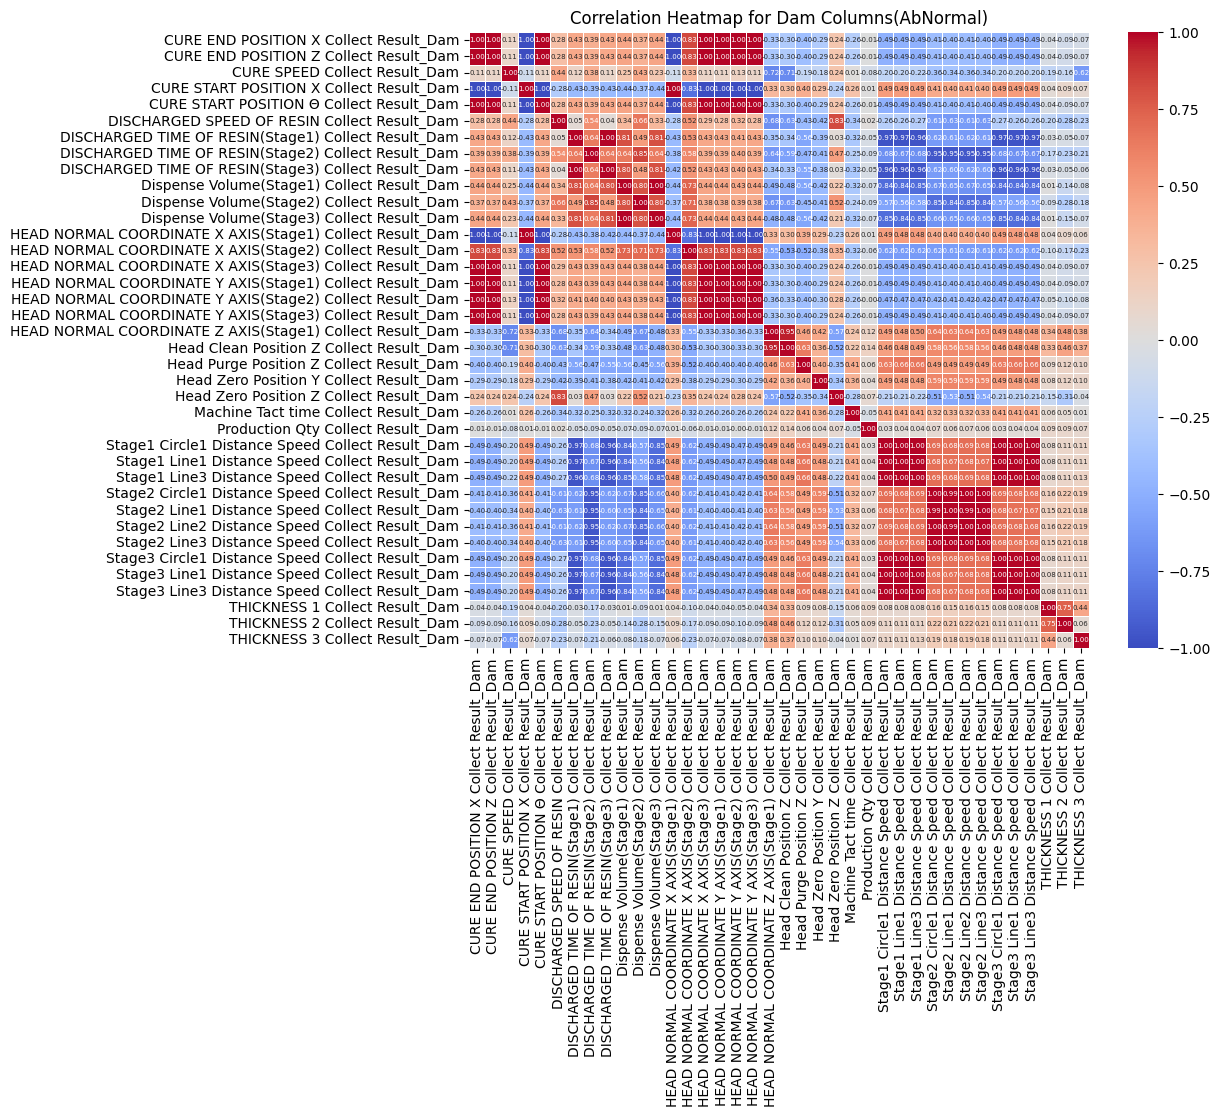

In [49]:
# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = no_category_abnormal.filter(like='Dam').copy()
print(len(dam_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
plt.title('Correlation Heatmap for Dam Columns(AbNormal)')
plt.show()

19


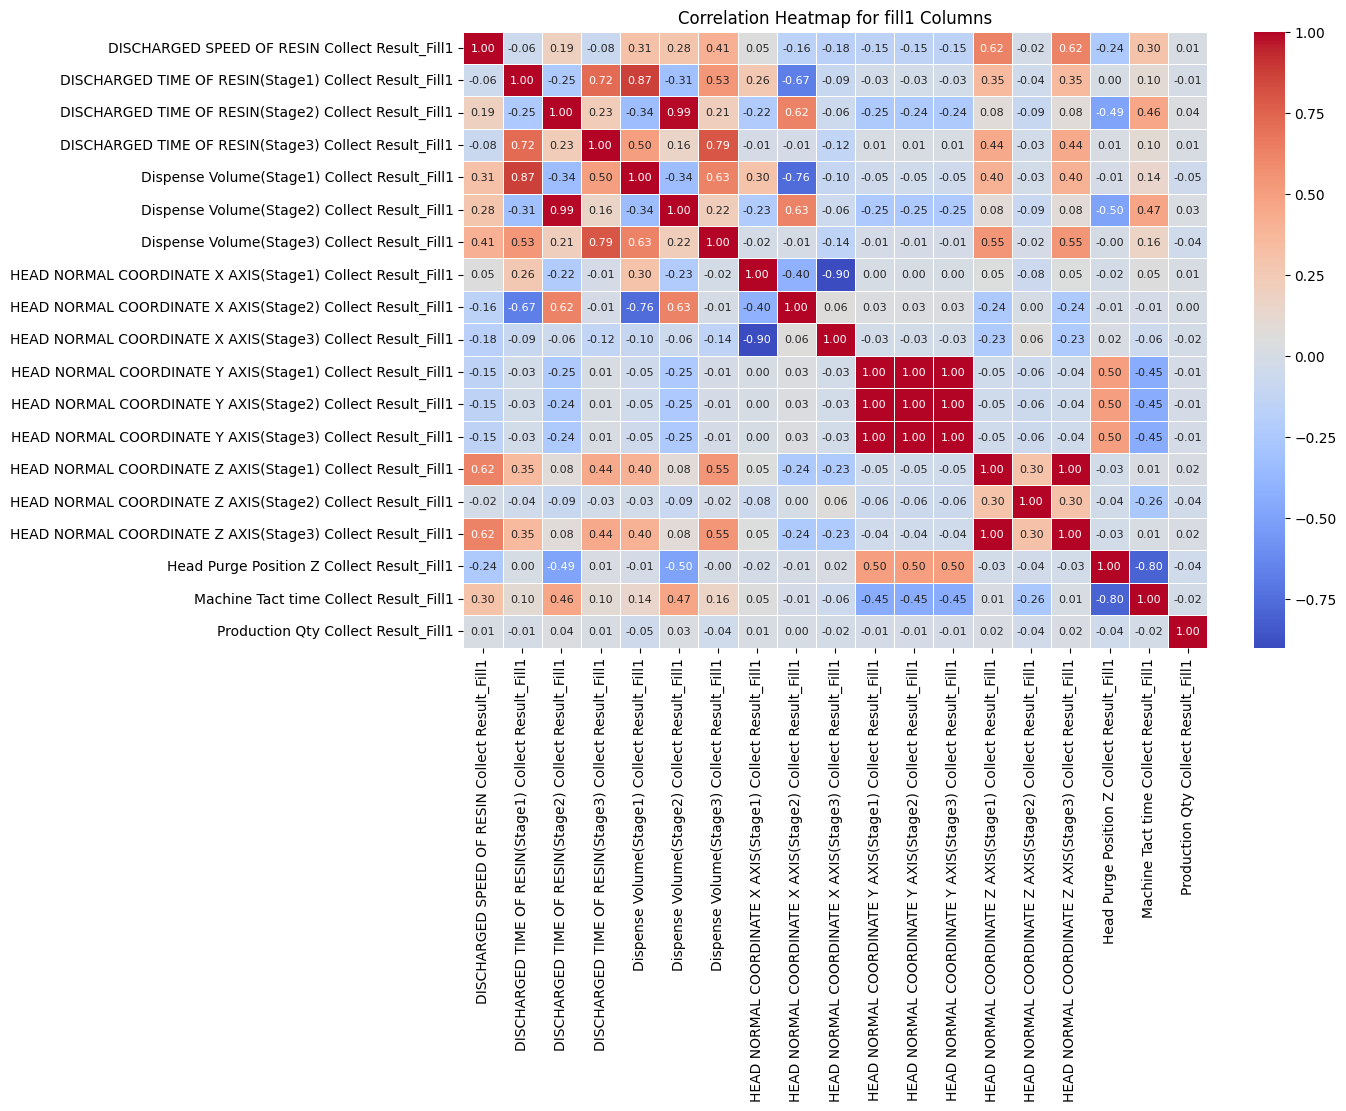

In [50]:
fill1_columns = no_category_abnormal.filter(like = 'Fill1').copy()
print(len(fill1_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill1 Columns')
plt.show()

14


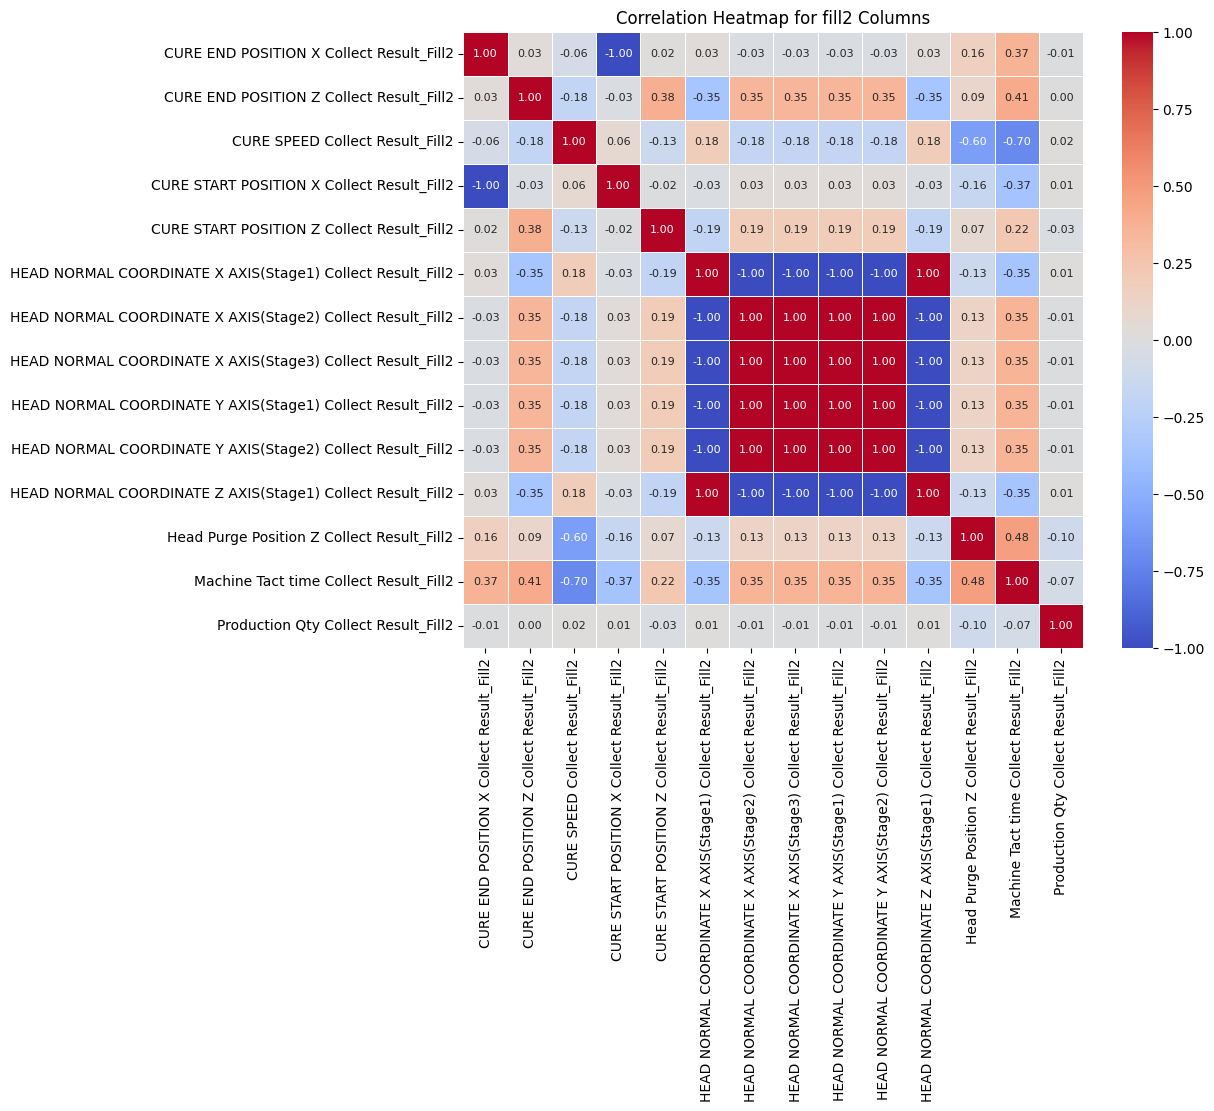

In [51]:
fill2_columns = no_category_abnormal.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill2 Columns')
plt.show()

8


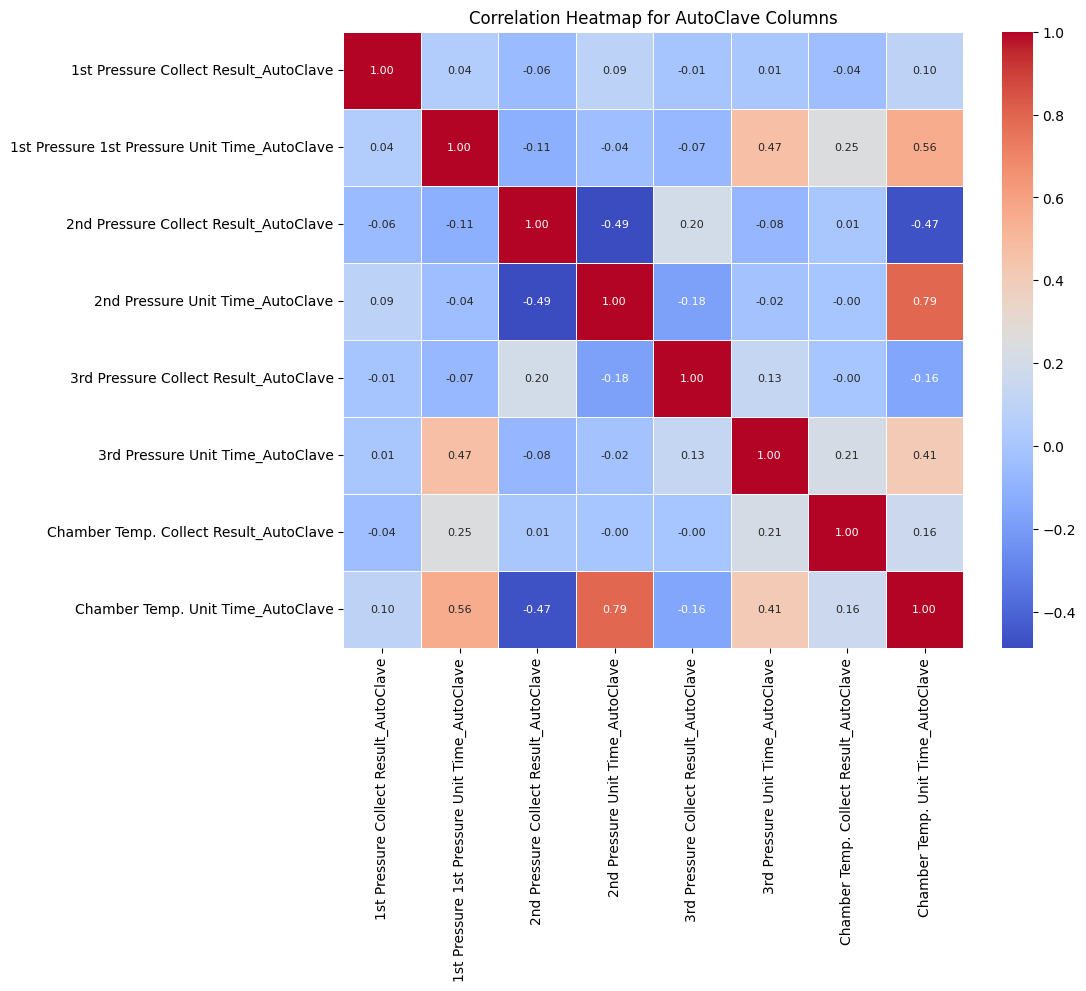

In [52]:
auto_columns = no_category_abnormal.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for AutoClave Columns')
plt.show()

## PCA

### 전체 데이터 스케일링 -> 정상, 불량, 전체 나눠서 PCA

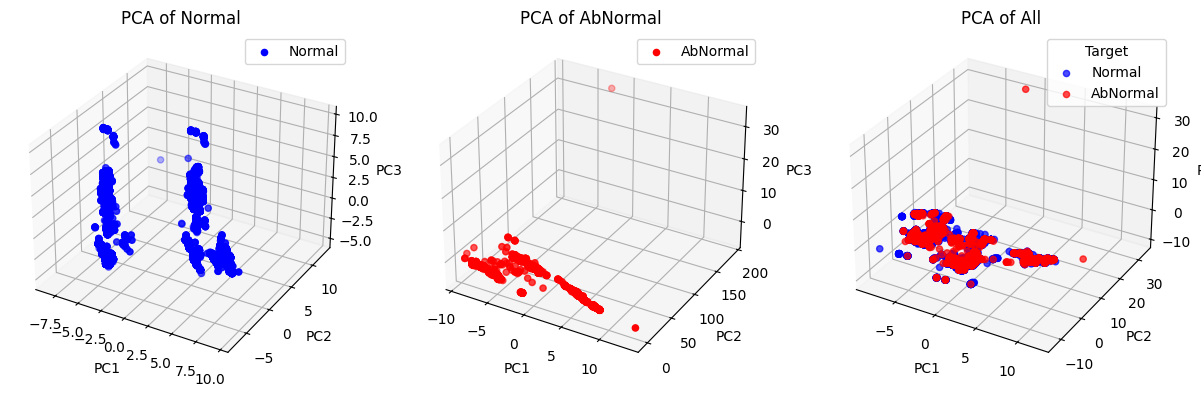

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 로드
train_cleaned_no_categorical = pd.read_csv('./data/train_cleaned_no_categorical.csv')

# 독립변수(X)와 종속변수(y) 분리
X = train_cleaned_no_categorical.drop('target', axis=1)
y = train_cleaned_no_categorical['target']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 정상 데이터만 분석
X_normal = X_scaled[y == 'Normal']
pca_normal = PCA(n_components=3)
principal_components_normal = pca_normal.fit_transform(X_normal)
pca_df_normal = pd.DataFrame(data=principal_components_normal, columns=['PC1', 'PC2', 'PC3'])

# 불량 데이터만 분석
X_abnormal = X_scaled[y == 'AbNormal']
pca_abnormal = PCA(n_components=3)
principal_components_abnormal = pca_abnormal.fit_transform(X_abnormal)
pca_df_abnormal = pd.DataFrame(data=principal_components_abnormal, columns=['PC1', 'PC2', 'PC3'])

# 전체 데이터 분석
pca_all = PCA(n_components=3)
principal_components_all = pca_all.fit_transform(X_scaled)
pca_df_all = pd.DataFrame(data=principal_components_all, columns=['PC1', 'PC2', 'PC3'])
pca_df_all['target'] = y

# 3D 시각화
fig = plt.figure(figsize=(15, 10))

# 정상 데이터
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(pca_df_normal['PC1'], pca_df_normal['PC2'], pca_df_normal['PC3'], color='b', label='Normal')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('PCA of Normal')
ax1.legend()

# 불량 데이터
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(pca_df_abnormal['PC1'], pca_df_abnormal['PC2'], pca_df_abnormal['PC3'], color='r', label='AbNormal')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('PCA of AbNormal')
ax2.legend()

# 전체 데이터
ax3 = fig.add_subplot(133, projection='3d')
colors = {'Normal': 'b', 'AbNormal': 'r'}
for target in pca_df_all['target'].unique():
    subset = pca_df_all[pca_df_all['target'] == target]
    ax3.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               color=colors[target], label=str(target), alpha=0.7)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('PCA of All')
ax3.legend(title='Target')

plt.show()

In [ ]:
# Normal 주성분의 피처 중요도 (계수)
components = pca_normal.components_

# 각 피처의 중요도
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 피처 중요도 출력
importance_df

CURE END POSITION X Collect Result_Dam  \
PC1                               -0.170423   
PC2                               -0.154263   
PC3                                0.022073   

     CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
PC1                               -0.170423                      -0.049696   
PC2                               -0.154263                       0.097959   
PC3                                0.022073                       0.147149   

     CURE START POSITION X Collect Result_Dam  \
PC1                                  0.170423   
PC2                                  0.154263   
PC3                                 -0.022073   

     CURE START POSITION Θ Collect Result_Dam  \
PC1                                 -0.170423   
PC2                                 -0.154263   
PC3                                  0.022073   

     DISCHARGED SPEED OF RESIN Collect Result_Dam  \
PC1                                     -0.084380   
PC2                                      0.097336   
PC3                                      0.260443   

     DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
PC1                                          -0.119799     
PC2                                           0.115447     
PC3                                          -0.227516     

     DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
PC1                                          -0.130178     
PC2                                           0.156871     
PC3                                           0.014297     

     DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
PC1                                          -0.118952     
PC2                                           0.113901     
PC3                                          -0.229685     

     Dispense Volume(Stage1) Collect Result_Dam  ...  \
PC1                                   -0.122999  ...   
PC2                                    0.131389  ...   
PC3                                   -0.149569  ...   

     CURE START POSITION Z Collect Result_Fill2  \
PC1                                   -0.060799   
PC2                                    0.057518   
PC3                                   -0.005526   

     HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2  \
PC1                                           0.170416            
PC2                                           0.154253            
PC3                                          -0.022079            

     HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2  \
PC1                                          -0.170415            
PC2                                          -0.154256            
PC3                                           0.022072            

     HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2  \
PC1                                          -0.170410            
PC2                                          -0.154273            
PC3                                           0.022028            

     HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2  \
PC1                                          -0.170415            
PC2                                          -0.154256            
PC3                                           0.022072            

     HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2  \
PC1                                          -0.170415            
PC2                                          -0.154256            
PC3                                           0.022072            

     HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2  \
PC1                                           0.170415            
PC2                                           0.154256            
PC3                                          -0.022072            

     Head Purge Position Z Collect Result_Fill2  \
PC1                                   -0.050229   
PC2                        

In [ ]:
# 주성분의 피처 중요도 (계수)
components = pca_normal.components_

# 각 피처의 중요도 데이터프레임 생성
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 상위 5개 피처와 계수를 저장할 데이터프레임 초기화
top_features_df = pd.DataFrame()

# 주성분별로 상위 5개의 피처와 그 계수를 추출하여 각각의 칼럼 생성
for pc in importance_df.index:
    top_features = importance_df.loc[pc].abs().nlargest(5)
    
    top_features_df[pc] = top_features.index
    top_features_df[f'{pc}_Importance'] = top_features.values

# 결과 출력
pd.set_option('display.max_colwidth', None)
top_features_df

PC1  PC1_Importance  \
0    HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam        0.171532   
1    HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam        0.170695   
2    HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam        0.170537   
3    HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam        0.170527   
4  HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1        0.170447   

                                                          PC2  PC2_Importance  \
0              Stage2 Line2 Distance Speed Collect Result_Dam        0.166840   
1            Stage2 Circle1 Distance Speed Collect Result_Dam        0.166836   
2              Stage2 Line1 Distance Speed Collect Result_Dam        0.164100   
3              Stage2 Line3 Distance Speed Collect Result_Dam        0.163891   
4  HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1        0.159229   

                                            PC3  PC3_Importance  
0              2nd Pressure Unit Time_AutoClave        0.268714  
1  DISCHARGED SPEED OF RESIN Collect Result_Dam        0.260443  
2         2nd Pressure Collect Result_AutoClave        0.258874  
3             Chamber Temp. Unit Time_AutoClave        0.243601  
4       Head Zero Position Z Collect Result_Dam        0.238129

In [ ]:
# AbNormal 주성분의 피처 중요도 (계수)
components = pca_abnormal.components_

# 각 피처의 중요도
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 피처 중요도 출력
importance_df

CURE END POSITION X Collect Result_Dam  \
PC1                               -0.148578   
PC2                                0.030815   
PC3                               -0.170242   

     CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
PC1                               -0.148578                      -0.048751   
PC2                                0.030815                      -0.040659   
PC3                               -0.170242                       0.085567   

     CURE START POSITION X Collect Result_Dam  \
PC1                                  0.148578   
PC2                                 -0.030815   
PC3                                  0.170242   

     CURE START POSITION Θ Collect Result_Dam  \
PC1                                 -0.148578   
PC2                                  0.030815   
PC3                                 -0.170242   

     DISCHARGED SPEED OF RESIN Collect Result_Dam  \
PC1                                     -0.093868   
PC2                                     -0.028461   
PC3                                      0.104732   

     DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
PC1                                            -0.131991   
PC2                                             0.000651   
PC3                                             0.075797   

     DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
PC1                                            -0.130308   
PC2                                            -0.030465   
PC3                                             0.121672   

     DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
PC1                                            -0.130983   
PC2                                             0.001336   
PC3                                             0.074065   

     Dispense Volume(Stage1) Collect Result_Dam  ...  \
PC1                                   -0.143310  ...   
PC2                                   -0.007749  ...   
PC3                                    0.091952  ...   

     CURE START POSITION Z Collect Result_Fill2  \
PC1                                   -0.070554   
PC2                                   -0.012080   
PC3                                    0.057384   

     HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2  \
PC1                                                    0.148604   
PC2                                                   -0.022007   
PC3                                                    0.171809   

     HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2  \
PC1                                                   -0.148604   
PC2                                                    0.022009   
PC3                                                   -0.171812   

     HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2  \
PC1                                                   -0.148603   
PC2                                                    0.022019   
PC3                                                   -0.171829   

     HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2  \
PC1                                                   -0.148604   
PC2                                                    0.022009   
PC3                                                   -0.171812   

     HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2  \
PC1                                                   -0.148604   
PC2                                                    0.022009   
PC3                                                   -0.171812   

     HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2  \
PC1                                                    0.148604   
PC2                                                   -0.022009   
PC3                                                    0.171812   

     Head Purge Position Z Collect Result_Fill2  \
PC1                                   -0.057091   
PC2                        

In [ ]:
# 주성분의 피처 중요도 (계수)
components = pca_abnormal.components_

# 각 피처의 중요도 데이터프레임 생성
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 상위 5개 피처와 계수를 저장할 데이터프레임 초기화
top_features_df = pd.DataFrame()

# 주성분별로 상위 5개의 피처와 그 계수를 추출하여 각각의 칼럼 생성
for pc in importance_df.index:
    top_features = importance_df.loc[pc].abs().nlargest(5)
    
    top_features_df[pc] = top_features.index
    top_features_df[f'{pc}_Importance'] = top_features.values

# 결과 출력
pd.set_option('display.max_colwidth', None)
top_features_df

PC1  PC1_Importance  \
0  HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam        0.168349   
1                Head Purge Position Z Collect Result_Fill1        0.161988   
2            Stage1 Line3 Distance Speed Collect Result_Dam        0.159575   
3          Stage3 Circle1 Distance Speed Collect Result_Dam        0.159232   
4          Stage1 Circle1 Distance Speed Collect Result_Dam        0.159154   

                                                          PC2  PC2_Importance  \
0  HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill1        0.644993   
1  HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1        0.644720   
2              DISCHARGED SPEED OF RESIN Collect Result_Fill1        0.191362   
3                Dispense Volume(Stage3) Collect Result_Fill1        0.184626   
4       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1        0.132905   

                                                          PC3  PC3_Importance  
0  HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2        0.171829  
1  HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2        0.171812  
2  HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2        0.171812  
3  HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2        0.171812  
4  HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2        0.171812

In [ ]:
# All 주성분의 피처 중요도 (계수)
components = pca_all.components_

# 각 피처의 중요도
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 피처 중요도 출력
importance_df

CURE END POSITION X Collect Result_Dam  \
PC1                               -0.168252   
PC2                                0.155991   
PC3                               -0.024981   

     CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
PC1                               -0.168252                      -0.049963   
PC2                                0.155991                      -0.098337   
PC3                               -0.024981                      -0.146556   

     CURE START POSITION X Collect Result_Dam  \
PC1                                  0.168252   
PC2                                 -0.155991   
PC3                                  0.024981   

     CURE START POSITION Θ Collect Result_Dam  \
PC1                                 -0.168252   
PC2                                  0.155991   
PC3                                 -0.024981   

     DISCHARGED SPEED OF RESIN Collect Result_Dam  \
PC1                                     -0.085493   
PC2                                     -0.098803   
PC3                                     -0.257388   

     DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
PC1                                          -0.121409     
PC2                                          -0.110821     
PC3                                           0.227812     

     DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
PC1                                          -0.131082     
PC2                                          -0.154246     
PC3                                          -0.013555     

     DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
PC1                                          -0.120546     
PC2                                          -0.109251     
PC3                                           0.229978     

     Dispense Volume(Stage1) Collect Result_Dam  ...  \
PC1                                   -0.125132  ...   
PC2                                   -0.127303  ...   
PC3                                    0.149469  ...   

     CURE START POSITION Z Collect Result_Fill2  \
PC1                                   -0.061789   
PC2                                   -0.057011   
PC3                                    0.006175   

     HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2  \
PC1                                           0.168235            
PC2                                          -0.155801            
PC3                                           0.025098            

     HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2  \
PC1                                          -0.168234            
PC2                                           0.155804            
PC3                                          -0.025090            

     HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2  \
PC1                                          -0.168229            
PC2                                           0.155821            
PC3                                          -0.025046            

     HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2  \
PC1                                          -0.168234            
PC2                                           0.155804            
PC3                                          -0.025090            

     HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2  \
PC1                                          -0.168234            
PC2                                           0.155804            
PC3                                          -0.025090            

     HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2  \
PC1                                           0.168234            
PC2                                          -0.155804            
PC3                                           0.025090            

     Head Purge Position Z Collect Result_Fill2  \
PC1                                   -0.050947   
PC2                        

In [ ]:
# 주성분의 피처 중요도 (계수)
components = pca_all.components_

# 각 피처의 중요도 데이터프레임 생성
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 상위 5개 피처와 계수를 저장할 데이터프레임 초기화
top_features_df = pd.DataFrame()

# 주성분별로 상위 5개의 피처와 그 계수를 추출하여 각각의 칼럼 생성
for pc in importance_df.index:
    top_features = importance_df.loc[pc].abs().nlargest(5)
    
    top_features_df[pc] = top_features.index
    top_features_df[f'{pc}_Importance'] = top_features.values

# 결과 출력
pd.set_option('display.max_colwidth', None)
top_features_df

PC1  PC1_Importance  \
0    HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam        0.171144   
1    HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam        0.168532   
2    HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam        0.168366   
3    HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam        0.168355   
4  HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1        0.168289   

                                                          PC2  PC2_Importance  \
0              Stage2 Line2 Distance Speed Collect Result_Dam        0.164614   
1            Stage2 Circle1 Distance Speed Collect Result_Dam        0.164610   
2              Stage2 Line1 Distance Speed Collect Result_Dam        0.162095   
3              Stage2 Line3 Distance Speed Collect Result_Dam        0.161853   
4  HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1        0.160597   

                                            PC3  PC3_Importance  
0              2nd Pressure Unit Time_AutoClave        0.266272  
1  DISCHARGED SPEED OF RESIN Collect Result_Dam        0.257388  
2         2nd Pressure Collect Result_AutoClave        0.257342  
3             Chamber Temp. Unit Time_AutoClave        0.239981  
4       Head Zero Position Z Collect Result_Dam        0.235166

### 정상, 불량, 전체 각각의 주성분 파악

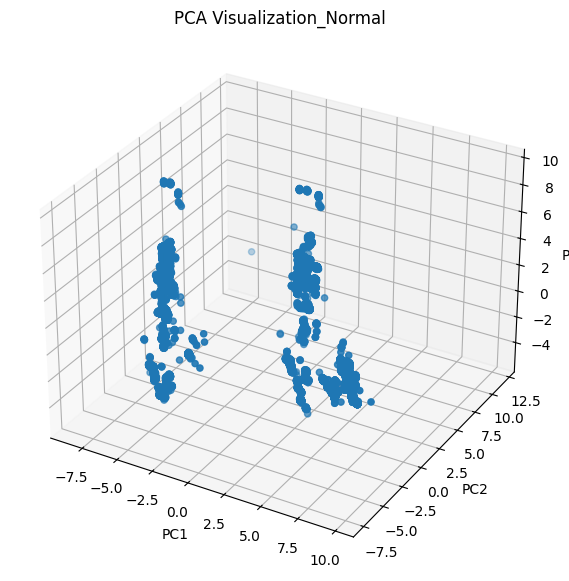

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

normal_no_categorical = pd.read_csv('./data/normal_no_categorical.csv')

# 독립변수(X)와 종속변수(y) 분리
X = normal_no_categorical.drop('target', axis=1)
y = normal_no_categorical['target']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)  # Reduce to 3 dimensions
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Visualization_Normal')

plt.show()

In [ ]:
# 주성분의 피처 중요도 (계수)
components = pca.components_

# 각 피처의 중요도 데이터프레임 생성
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 상위 5개 피처와 계수를 저장할 데이터프레임 초기화
top_features_df = pd.DataFrame()

# 주성분별로 상위 5개의 피처와 그 계수를 추출하여 각각의 칼럼 생성
for pc in importance_df.index:
    top_features = importance_df.loc[pc].abs().nlargest(5)
    
    top_features_df[pc] = top_features.index
    top_features_df[f'{pc}_Importance'] = top_features.values

# 결과 출력
pd.set_option('display.max_colwidth', None)
top_features_df

PC1  PC1_Importance  \
0    HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam        0.169046   
1    HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam        0.159648   
2    HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam        0.159615   
3  HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1        0.159536   
4  HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1        0.159532   

                                                          PC2  PC2_Importance  \
0  HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1        0.175722   
1    HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam        0.162782   
2    HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam        0.161315   
3  HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1        0.160444   
4                      CURE END POSITION X Collect Result_Dam        0.160357   

                                                   PC3  PC3_Importance  
0                     2nd Pressure Unit Time_AutoClave        0.249771  
1  DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam        0.242847  
2                2nd Pressure Collect Result_AutoClave        0.240096  
3  DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam        0.239995  
4         DISCHARGED SPEED OF RESIN Collect Result_Dam        0.231280

In [ ]:
pca_df_normal

PC1       PC2       PC3
0      0.247632  5.149990  2.703829
1     -6.637339 -0.361843  1.945401
2      1.994540  2.532803  1.368588
3     -4.795664 -2.553007  2.826654
4     -5.971236 -1.096591  2.591852
...         ...       ...       ...
38151  8.470812 -4.075280  0.268434
38152  6.690981 -1.883042  0.329851
38153  6.671010 -1.954380  0.215043
38154  2.168046  2.088270 -3.610696
38155 -1.322068 -6.437850  1.063986

[38156 rows x 3 columns]

In [ ]:
pca_df

PC1       PC2       PC3
0      0.151910  5.385261  2.448941
1     -6.624832 -0.340760  1.930932
2      1.936480  2.627487  1.176754
3     -4.800803 -2.282142  3.150230
4     -5.951975 -1.019098  2.631487
...         ...       ...       ...
38151  8.599448 -4.067329  0.475403
38152  6.729694 -1.742393  0.522306
38153  6.709706 -1.814840  0.419542
38154  2.118175  1.941582 -3.691471
38155 -1.261923 -6.291222  1.560087

[38156 rows x 3 columns]

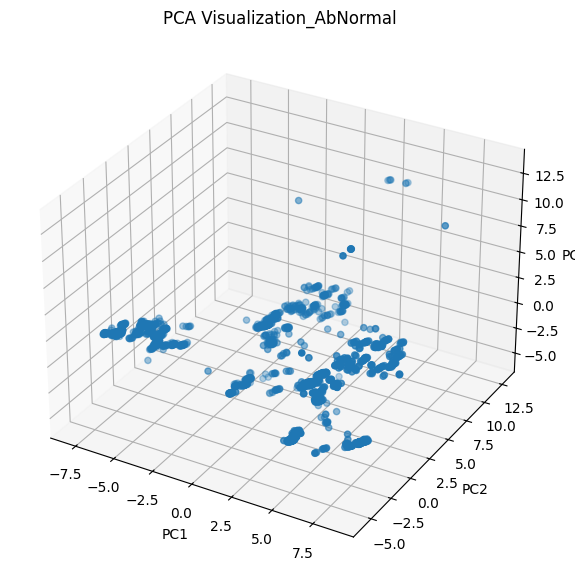

In [ ]:
abnormal_no_categorical = pd.read_csv('./data/abnormal_no_categorical.csv')

# 독립변수(X)와 종속변수(y) 분리
X = abnormal_no_categorical.drop('target', axis=1)
y = abnormal_no_categorical['target']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3) 
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Visualization_AbNormal')

plt.show()

In [ ]:
# 주성분의 피처 중요도 (계수)
components = pca.components_

# 각 피처의 중요도 데이터프레임 생성
importance_df = pd.DataFrame(components, columns=X.columns)
importance_df.index = [f'PC{i+1}' for i in range(components.shape[0])]

# 상위 5개 피처와 계수를 저장할 데이터프레임 초기화
top_features_df = pd.DataFrame()

# 주성분별로 상위 5개의 피처와 그 계수를 추출하여 각각의 칼럼 생성
for pc in importance_df.index:
    top_features = importance_df.loc[pc].abs().nlargest(5)
    
    top_features_df[pc] = top_features.index
    top_features_df[f'{pc}_Importance'] = top_features.values

# 결과 출력
pd.set_option('display.max_colwidth', None)
top_features_df

PC1  PC1_Importance  \
0    HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam        0.169046   
1    HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam        0.159648   
2    HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam        0.159615   
3  HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1        0.159536   
4  HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1        0.159532   

                                                          PC2  PC2_Importance  \
0  HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1        0.175722   
1    HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam        0.162782   
2    HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam        0.161315   
3  HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1        0.160444   
4                      CURE END POSITION X Collect Result_Dam        0.160357   

                                                   PC3  PC3_Importance  
0                     2nd Pressure Unit Time_AutoClave        0.249771  
1  DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam        0.242847  
2                2nd Pressure Collect Result_AutoClave        0.240096  
3  DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam        0.239995  
4         DISCHARGED SPEED OF RESIN Collect Result_Dam        0.231280

In [ ]:
pca_df_abnormal

PC1       PC2       PC3
0    -1.285976 -2.999592  5.750400
1    -2.299140 -4.421363  5.597049
2     0.439974 -0.336204  4.044168
3    -1.960505 -0.992252  5.044379
4     0.450995 -1.832338  3.836393
...        ...       ...       ...
2345  5.581652 -0.369932 -0.047895
2346  6.176721 -0.555742 -0.545332
2347 -7.265446  1.205744 -1.662737
2348  6.724994 -0.668533 -1.238070
2349  7.964428  0.581486 -2.489983

[2350 rows x 3 columns]

In [ ]:
pca_df

PC1       PC2       PC3
0     0.833018  6.464204  2.797239
1     2.048278  7.350081  0.950767
2    -0.921555  3.566827  0.286802
3     1.395647  4.726621 -5.330069
4    -0.971050  3.678557  0.732859
...        ...       ...       ...
2345 -5.424568 -0.255777  0.588554
2346 -6.023769 -0.636462  0.976955
2347  7.157466 -1.910777 -3.679099
2348 -6.343133 -1.048814  1.125473
2349 -7.291497 -2.335299  0.770443

[2350 rows x 3 columns]

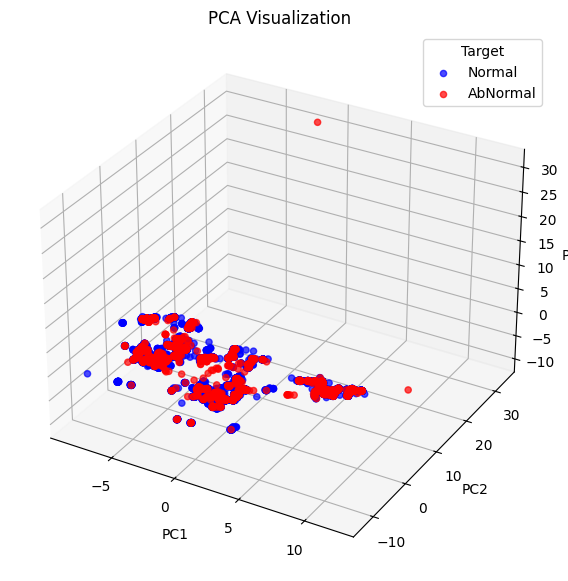

In [ ]:
train_cleaned_no_categorical = pd.read_csv('./data/train_cleaned_no_categorical.csv')

# 독립변수(X)와 종속변수(y) 분리
X = train_cleaned_no_categorical.drop('target', axis=1)
y = train_cleaned_no_categorical['target']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['target'] = y

# 3D 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = {'Normal':'b', 'AbNormal':'r'}

for target in pca_df['target'].unique():
    subset = pca_df[pca_df['target'] == target]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'],
               color=colors[target], label=str(target), alpha=0.7)

ax.legend(title='Target')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Visualization')

plt.show()

In [ ]:
pca_df_all

PC1       PC2       PC3    target
0      0.132109 -5.216765 -2.613993    Normal
1     -6.678714  0.380519 -1.984676    Normal
2      1.910706 -2.602437 -1.278556    Normal
3     -4.811971  2.525175 -2.863826    Normal
4     -6.001481  1.094146 -2.627911    Normal
...         ...       ...       ...       ...
40501  6.662000  1.725515 -0.343519    Normal
40502  6.649403  1.803511 -0.232803    Normal
40503  2.074007 -2.124520  3.650480    Normal
40504 -1.296948  6.368030 -1.156154    Normal
40505  8.435471  3.972042 -0.393516  AbNormal

[40506 rows x 4 columns]

In [ ]:
pca_df

PC1       PC2       PC3    target
0      0.132109 -5.216764 -2.613999    Normal
1     -6.678714  0.380519 -1.984676    Normal
2      1.910706 -2.602437 -1.278559    Normal
3     -4.811971  2.525175 -2.863821    Normal
4     -6.001481  1.094146 -2.627914    Normal
...         ...       ...       ...       ...
40501  6.662000  1.725515 -0.343519    Normal
40502  6.649403  1.803511 -0.232805    Normal
40503  2.074007 -2.124521  3.650487    Normal
40504 -1.296948  6.368029 -1.156145    Normal
40505  8.435471  3.972042 -0.393516  AbNormal

[40506 rows x 4 columns]

In [ ]:
train_cleaned_no_categorical = pd.read_csv('./data/train_cleaned_no_categorical.csv')
normal_no_categorical = pd.read_csv('./data/normal_no_categorical.csv')
abnormal_no_categorical = pd.read_csv('./data/abnormal_no_categorical.csv')

# 전처리 끝!!!

## 정규화 없이 모델링

### 데이터 부르기

In [2]:
# 학습을 위해 train_data를 지정
train_data = pd.read_csv('./data/train_cleaned.csv')
train_data

Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
0      Dam dispenser #1  AJX75334505                                   240.0   
1      Dam dispenser #2  AJX75334501                                  1000.0   
2      Dam dispenser #1  AJX75334501                                   240.0   
3      Dam dispenser #2  AJX75334501                                  1000.0   
4      Dam dispenser #2  AJX75334501                                  1000.0   
...                 ...          ...                                     ...   
40501  Dam dispenser #1  AJX75334501                                   240.0   
40502  Dam dispenser #1  AJX75334501                                   240.0   
40503  Dam dispenser #1  AJX75334501                                   240.0   
40504  Dam dispenser #2  AJX75334501                                  1000.0   
40505  Dam dispenser #1  AJX75334501                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2              

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

# 범주형 열을 선택하여 인코딩 수행
categorical_features = ['Equipment_Dam', 'Equipment_Fill1', 'Equipment_Fill2']

# OrdinalEncoder 인스턴스 생성
encoder = OrdinalEncoder()

# 범주형 열에 대해서만 인코딩 수행
train_data[categorical_features] = encoder.fit_transform(train_data[categorical_features])

# 인코딩된 데이터프레임 확인
train_data

Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
0                0.0  AJX75334505                                   240.0   
1                1.0  AJX75334501                                  1000.0   
2                0.0  AJX75334501                                   240.0   
3                1.0  AJX75334501                                  1000.0   
4                1.0  AJX75334501                                  1000.0   
...              ...          ...                                     ...   
40501            0.0  AJX75334501                                   240.0   
40502            0.0  AJX75334501                                   240.0   
40503            0.0  AJX75334501                                   240.0   
40504            1.0  AJX75334501                                  1000.0   
40505            0.0  AJX75334501                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2                                               

In [4]:
# 각 범주에 대한 인코딩 값 확인
for feature, categories in zip(categorical_features, encoder.categories_):
    print(f"Feature: {feature}")
    for category, index in zip(categories, range(len(categories))):
        print(f"  {category}: {index}")

Feature: Equipment_Dam
  Dam dispenser #1: 0
  Dam dispenser #2: 1
Feature: Equipment_Fill1
  Fill1 dispenser #1: 0
  Fill1 dispenser #2: 1
Feature: Equipment_Fill2
  Fill2 dispenser #1: 0
  Fill2 dispenser #2: 1


In [5]:
columns_to_drop = [
    'Model.Suffix', 'Chamber Temp. Judge Value_AutoClave']

# 열 삭제
train_data = train_data.drop(columns=columns_to_drop)

In [6]:
# 세 가지 조건: 열 간 값이 다르면 불량으로 분류
condition_receip = (
    (train_data['Receip No Collect Result_Dam'] != train_data['Receip No Collect Result_Fill1']) |
    (train_data['Receip No Collect Result_Dam'] != train_data['Receip No Collect Result_Fill2']) |
    (train_data['Receip No Collect Result_Fill1'] != train_data['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (train_data['Production Qty Collect Result_Dam'] != train_data['Production Qty Collect Result_Fill1']) |
    (train_data['Production Qty Collect Result_Dam'] != train_data['Production Qty Collect Result_Fill2']) |
    (train_data['Production Qty Collect Result_Fill1'] != train_data['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (train_data['PalletID Collect Result_Dam'] != train_data['PalletID Collect Result_Fill1']) |
    (train_data['PalletID Collect Result_Dam'] != train_data['PalletID Collect Result_Fill2']) |
    (train_data['PalletID Collect Result_Fill1'] != train_data['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
equip1 = train_data[categorical_features].eq(0).all(axis=1)
equip2 = train_data[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~equip1 & ~equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
df_abnormal = train_data[condition_abnormal]  # 불량 데이터
df_filtered = train_data[~condition_abnormal]  # 정상 데이터

# 정상 데이터에서 장비별로 데이터 분리
df_model1 = df_filtered[df_filtered[categorical_features].eq(0).all(axis=1)]
df_model2 = df_filtered[df_filtered[categorical_features].eq(1).all(axis=1)]

# 결과 확인
print(f"불량 데이터: {len(df_abnormal)} 행")
print(f"정상 데이터: {len(df_filtered)} 행")
print(f"Equipment #1 데이터: {len(df_model1)} 행")
print(f"Equipment #2 데이터: {len(df_model2)} 행")

불량 데이터: 94 행
정상 데이터: 40412 행
Equipment #1 데이터: 24968 행
Equipment #2 데이터: 15444 행


### 오버샘플링 기법  
1. from sklearn.utils import resample : 소수 클래스 데이터 단순 복제  
2. from imblearn.over_sampling import SMOTE : 데이터 포인트들 사이의 선형 보간(interpolation)

In [92]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 랜덤 시드 설정
RANDOM_STATE = 42

# train/val split
df_train, df_val = train_test_split(
    train_data,
    test_size=0.3,
    stratify=train_data["target"],
    random_state=RANDOM_STATE,
)

# Features와 타겟 분리 (train 데이터)
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]

# Features와 타겟 분리 (validation 데이터)
X_val = df_val.drop(columns=["target"])
y_val = df_val["target"]

In [93]:
# SMOTE 오버샘플링 수행
smote = SMOTE(random_state=RANDOM_STATE)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE 이후의 타겟값 분포 확인
print("Train data after SMOTE:")
print(y_train_smote.value_counts())

# Validation 데이터의 타겟값 분포 확인
print("\nValidation data:")
print(y_val.value_counts())

# SMOTE 결과를 DataFrame으로 변환
df_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
df_train_smote["target"] = y_train_smote

# Print statistics function
def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])
    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal:.2f}")

# Print statistics
print("\nStatistics after SMOTE and splitting:")
print("Train data:")
print_stats(df_train_smote)
print("Validation data:")
print_stats(df_val)

Train data after SMOTE:
target
Normal      26709
AbNormal    26709
Name: count, dtype: int64

Validation data:
target
Normal      11447
AbNormal      705
Name: count, dtype: int64

Statistics after SMOTE and splitting:
Train data:
  Total: Normal: 26709, AbNormal: 26709 ratio: 1.00
Validation data:
  Total: Normal: 11447, AbNormal: 705 ratio: 0.06


### 모델 학습


In [116]:
# 세 가지 조건: 열 간 값이 다르면 불량으로 분류
condition_receip = (
    (df_train_smote['Receip No Collect Result_Dam'] != df_train_smote['Receip No Collect Result_Fill1']) |
    (df_train_smote['Receip No Collect Result_Dam'] != df_train_smote['Receip No Collect Result_Fill2']) |
    (df_train_smote['Receip No Collect Result_Fill1'] != df_train_smote['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (df_train_smote['Production Qty Collect Result_Dam'] != df_train_smote['Production Qty Collect Result_Fill1']) |
    (df_train_smote['Production Qty Collect Result_Dam'] != df_train_smote['Production Qty Collect Result_Fill2']) |
    (df_train_smote['Production Qty Collect Result_Fill1'] != df_train_smote['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (df_train_smote['PalletID Collect Result_Dam'] != df_train_smote['PalletID Collect Result_Fill1']) |
    (df_train_smote['PalletID Collect Result_Dam'] != df_train_smote['PalletID Collect Result_Fill2']) |
    (df_train_smote['PalletID Collect Result_Fill1'] != df_train_smote['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
equip1 = df_train_smote[categorical_features].eq(0).all(axis=1)
equip2 = df_train_smote[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~equip1 & ~equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
df_abnormal = df_train_smote[condition_abnormal]  # 불량 데이터
df_filtered = df_train_smote[~condition_abnormal]  # 정상 데이터

# 정상 데이터에서 장비별로 데이터 분리
df_model1 = df_filtered[df_filtered[categorical_features].eq(0).all(axis=1)]
df_model2 = df_filtered[df_filtered[categorical_features].eq(1).all(axis=1)]

# 결과 확인
print(f"불량 데이터: {len(df_abnormal)} 행")
print(f"정상 데이터: {len(df_filtered)} 행")
print(f"Equipment #1 데이터: {len(df_model1)} 행")
print(f"Equipment #2 데이터: {len(df_model2)} 행")

# 장비별로 고유값이 1개인 컬럼 제외
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
def unique_column_drop(df):
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    # 데이터 프레임에서 해당 열 삭제
    return df.drop(columns=constant_columns), constant_columns
# 장비별 drop columns 저장
df_model1, drop_column1 = unique_column_drop(df_model1)
df_model2, drop_column2 = unique_column_drop(df_model2)

불량 데이터: 1475 행
정상 데이터: 51943 행
Equipment #1 데이터: 32492 행
Equipment #2 데이터: 19451 행


In [95]:
df_abnormal['target'].unique()

array(['AbNormal'], dtype=object)

In [117]:
# 추가로 제거할 열들
additional_drop_column1 = [
                            'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
                            'Dispense Volume(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
                            'Head Clean Position Z Collect Result_Dam',
                            'Stage1 Line3 Distance Speed Collect Result_Dam',
                            'Stage2 Line1 Distance Speed Collect Result_Dam',
                            'Stage2 Line2 Distance Speed Collect Result_Dam',
                            'Stage2 Line3 Distance Speed Collect Result_Dam',
                            'Stage3 Line1 Distance Speed Collect Result_Dam',
                            'Stage3 Line3 Distance Speed Collect Result_Dam',
                            'Head Zero Position Z Collect Result_Dam',

                            'Dispense Volume(Stage1) Collect Result_Fill1',
                            'Dispense Volume(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',

                            'CURE START POSITION X Collect Result_Fill2',

                            'Chamber Temp. Unit Time_AutoClave',

                            'Receip No Collect Result_Dam',
                            'Receip No Collect Result_Fill1',
                            'Receip No Collect Result_Fill2',
                            'Production Qty Collect Result_Dam',
                            'Production Qty Collect Result_Fill1',
                            'Production Qty Collect Result_Fill2',
                            'PalletID Collect Result_Dam',
                            'PalletID Collect Result_Fill1',
                            'PalletID Collect Result_Fill2'
                            ]

additional_drop_column2 = [
                            'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
                            'Dispense Volume(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
                            'Head Clean Position Z Collect Result_Dam',
                            'Stage1 Line1 Distance Speed Collect Result_Dam',
                            'Stage1 Line3 Distance Speed Collect Result_Dam',
                            'Stage2 Line1 Distance Speed Collect Result_Dam',
                            'Stage2 Line2 Distance Speed Collect Result_Dam',
                            'Stage2 Line3 Distance Speed Collect Result_Dam',
                            'Stage3 Circle1 Distance Speed Collect Result_Dam',
                            'Stage3 Line1 Distance Speed Collect Result_Dam',
                            'Stage3 Line3 Distance Speed Collect Result_Dam',
                            'Head Zero Position Z Collect Result_Dam',

                            'Dispense Volume(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',

                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
                            'CURE START POSITION X Collect Result_Fill2',

                            'Chamber Temp. Unit Time_AutoClave',

                            'Receip No Collect Result_Dam',
                            'Receip No Collect Result_Fill1',
                            'Receip No Collect Result_Fill2',
                            'Production Qty Collect Result_Dam',
                            'Production Qty Collect Result_Fill1',
                            'Production Qty Collect Result_Fill2',
                            'PalletID Collect Result_Dam',
                            'PalletID Collect Result_Fill1',
                            'PalletID Collect Result_Fill2'
                            ]

# drop_column에 추가적인 열들을 더함
drop_column1.extend(additional_drop_column1)
drop_column2.extend(additional_drop_column2)

# 데이터 프레임에서 추가적인 열들 제거
df_model1 = df_model1.drop(columns=additional_drop_column1)
df_model2 = df_model2.drop(columns=additional_drop_column2)

# 결과 확인
print(f"Equipment #1에서 제거된 모든 열: {drop_column1}")
print(f"Equipment #2에서 제거된 모든 열: {drop_column2}")

Equipment #1에서 제거된 모든 열: ['Equipment_Dam', 'CURE END POSITION X Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'Head Clean Position Z Collect Res

In [118]:
len(drop_column1)

46

In [119]:
len(drop_column2)

46

In [120]:
# 데이터와 타겟 분리
X_model1 = df_model1.drop(columns='target')
y_model1 = df_model1['target']
X_model2 = df_model2.drop(columns='target')
y_model2 = df_model2['target']

# 모델 훈련
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_model1, y_model1)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_model2, y_model2)

RandomForestClassifier(random_state=42)

### 모델 평가

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

val_y = df_val["target"]

#  세 가지 조건: 열 간 값이 다르면 불량으로 분류
condition_receip = (
    (df_val['Receip No Collect Result_Dam'] != df_val['Receip No Collect Result_Fill1']) |
    (df_val['Receip No Collect Result_Dam'] != df_val['Receip No Collect Result_Fill2']) |
    (df_val['Receip No Collect Result_Fill1'] != df_val['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (df_val['Production Qty Collect Result_Dam'] != df_val['Production Qty Collect Result_Fill1']) |
    (df_val['Production Qty Collect Result_Dam'] != df_val['Production Qty Collect Result_Fill2']) |
    (df_val['Production Qty Collect Result_Fill1'] != df_val['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (df_val['PalletID Collect Result_Dam'] != df_val['PalletID Collect Result_Fill1']) |
    (df_val['PalletID Collect Result_Dam'] != df_val['PalletID Collect Result_Fill2']) |
    (df_val['PalletID Collect Result_Fill1'] != df_val['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
val_equip1 = df_val[categorical_features].eq(0).all(axis=1)
val_equip2 = df_val[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~val_equip1 & ~val_equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
val_abnormal = df_val[condition_abnormal]  # 불량 데이터
val_filtered = df_val[~condition_abnormal]  # 정상 데이터


# 예측 함수 정의
def apply_prediction(df, categorical_features, model1, model2, constant_columns_model1, constant_columns_model2):
    predictions = []
    for _, row in df.iterrows():
        if row.name in val_abnormal.index:
            # abnormal 데이터인 경우 'AbNormal'로 예측
            predictions.append('AbNormal')

        elif all(row[feature] == 0 for feature in categorical_features):
            filtered_row = row.drop(labels=constant_columns_model1)
            filtered_row_df = pd.DataFrame([filtered_row], columns=filtered_row.index)
            predictions.append(model1.predict(filtered_row_df)[0])
            
        elif all(row[feature] == 1 for feature in categorical_features):
            filtered_row = row.drop(labels=constant_columns_model2)
            filtered_row_df = pd.DataFrame([filtered_row], columns=filtered_row.index)
            predictions.append(model2.predict(filtered_row_df)[0])
            
        else:
            predictions.append('AbNormal')
    
    return predictions

drop_column1.append('target')
drop_column2.append('target')

# 데이터에 대해 예측 수행
val_predictions = apply_prediction(df_val, categorical_features, model1, model2, drop_column1, drop_column2)

# 정확도 계산
val_accuracy = accuracy_score(val_y, val_predictions)

# F1 스코어 계산
val_f1_score = f1_score(val_y, val_predictions, pos_label="AbNormal")

# 결과 출력
print(f"검증 데이터 정확도: {val_accuracy:.4f}")
print(f"검증 데이터 F1 스코어: {val_f1_score:.4f}")

검증 데이터 정확도: 0.9408
검증 데이터 F1 스코어: 0.1306


## 정규화 하고 모델링

### 모델학습

In [76]:
# df_train과 df_val를 분리하고 df_train에 대해 오버샘플링을 수행 (이미 수행한 상태)

# 세 가지 조건: 열 간 값이 다르면 불량으로 분류
condition_receip = (
    (df_train_smote['Receip No Collect Result_Dam'] != df_train_smote['Receip No Collect Result_Fill1']) |
    (df_train_smote['Receip No Collect Result_Dam'] != df_train_smote['Receip No Collect Result_Fill2']) |
    (df_train_smote['Receip No Collect Result_Fill1'] != df_train_smote['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (df_train_smote['Production Qty Collect Result_Dam'] != df_train_smote['Production Qty Collect Result_Fill1']) |
    (df_train_smote['Production Qty Collect Result_Dam'] != df_train_smote['Production Qty Collect Result_Fill2']) |
    (df_train_smote['Production Qty Collect Result_Fill1'] != df_train_smote['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (df_train_smote['PalletID Collect Result_Dam'] != df_train_smote['PalletID Collect Result_Fill1']) |
    (df_train_smote['PalletID Collect Result_Dam'] != df_train_smote['PalletID Collect Result_Fill2']) |
    (df_train_smote['PalletID Collect Result_Fill1'] != df_train_smote['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
equip1 = df_train_smote[categorical_features].eq(0).all(axis=1)
equip2 = df_train_smote[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~equip1 & ~equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
df_abnormal = df_train_smote[condition_abnormal]  # 불량 데이터
df_filtered = df_train_smote[~condition_abnormal]  # 정상 데이터

# 정상 데이터에서 장비별로 데이터 분리
df_model1 = df_filtered[df_filtered[categorical_features].eq(0).all(axis=1)]
df_model2 = df_filtered[df_filtered[categorical_features].eq(1).all(axis=1)]

# 결과 확인
print(f"불량 데이터: {len(df_abnormal)} 행")
print(f"정상 데이터: {len(df_filtered)} 행")
print(f"Equipment #1 데이터: {len(df_model1)} 행")
print(f"Equipment #2 데이터: {len(df_model2)} 행")

# 장비별로 고유값이 1개인 컬럼 제외
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
def unique_column_drop(df):
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    # 데이터 프레임에서 해당 열 삭제
    return df.drop(columns=constant_columns), constant_columns
# 장비별 drop columns 저장
df_model1, drop_column1 = unique_column_drop(df_model1)
df_model2, drop_column2 = unique_column_drop(df_model2)

불량 데이터: 1475 행
정상 데이터: 51943 행
Equipment #1 데이터: 32492 행
Equipment #2 데이터: 19451 행


In [77]:
df_model1# 추가로 제거할 열들
additional_drop_column1 = [
                            'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
                            'Dispense Volume(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
                            'Head Clean Position Z Collect Result_Dam',
                            'Stage1 Line3 Distance Speed Collect Result_Dam',
                            'Stage2 Line1 Distance Speed Collect Result_Dam',
                            'Stage2 Line2 Distance Speed Collect Result_Dam',
                            'Stage2 Line3 Distance Speed Collect Result_Dam',
                            'Stage3 Line1 Distance Speed Collect Result_Dam',
                            'Stage3 Line3 Distance Speed Collect Result_Dam',
                            'Head Zero Position Z Collect Result_Dam',

                            'Dispense Volume(Stage1) Collect Result_Fill1',
                            'Dispense Volume(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',

                            'CURE START POSITION X Collect Result_Fill2',

                            'Chamber Temp. Unit Time_AutoClave',

                            'Receip No Collect Result_Dam',
                            'Receip No Collect Result_Fill1',
                            'Receip No Collect Result_Fill2',
                            'Production Qty Collect Result_Dam',
                            'Production Qty Collect Result_Fill1',
                            'Production Qty Collect Result_Fill2',
                            'PalletID Collect Result_Dam',
                            'PalletID Collect Result_Fill1',
                            'PalletID Collect Result_Fill2'
                            ]

additional_drop_column2 = [
                            'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
                            'Dispense Volume(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
                            'Head Clean Position Z Collect Result_Dam',
                            'Stage1 Line1 Distance Speed Collect Result_Dam',
                            'Stage1 Line3 Distance Speed Collect Result_Dam',
                            'Stage2 Line1 Distance Speed Collect Result_Dam',
                            'Stage2 Line2 Distance Speed Collect Result_Dam',
                            'Stage2 Line3 Distance Speed Collect Result_Dam',
                            'Stage3 Circle1 Distance Speed Collect Result_Dam',
                            'Stage3 Line1 Distance Speed Collect Result_Dam',
                            'Stage3 Line3 Distance Speed Collect Result_Dam',
                            'Head Zero Position Z Collect Result_Dam',

                            'Dispense Volume(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1',
                            'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1',

                            'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2',
                            'CURE START POSITION X Collect Result_Fill2',

                            'Chamber Temp. Unit Time_AutoClave',

                            'Receip No Collect Result_Dam',
                            'Receip No Collect Result_Fill1',
                            'Receip No Collect Result_Fill2',
                            'Production Qty Collect Result_Dam',
                            'Production Qty Collect Result_Fill1',
                            'Production Qty Collect Result_Fill2',
                            'PalletID Collect Result_Dam',
                            'PalletID Collect Result_Fill1',
                            'PalletID Collect Result_Fill2'
                            ]

# drop_column에 추가적인 열들을 더함
drop_column1.extend(additional_drop_column1)
drop_column2.extend(additional_drop_column2)

# 데이터 프레임에서 추가적인 열들 제거
df_model1 = df_model1.drop(columns=additional_drop_column1)
df_model2 = df_model2.drop(columns=additional_drop_column2)

# 결과 확인
print(f"Equipment #1에서 제거된 모든 열: {drop_column1}")
print(f"Equipment #2에서 제거된 모든 열: {drop_column2}")

Equipment #1에서 제거된 모든 열: ['Equipment_Dam', 'CURE END POSITION X Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'Head Clean Position Z Collect Res

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 데이터와 타겟 분리
X_model1 = df_model1.drop(columns='target')
y_model1 = df_model1['target']
X_model2 = df_model2.drop(columns='target')
y_model2 = df_model2['target']

# 정규화 수행 - 학습 데이터에서만 fit을 수행
X_model1_scaled = scaler.fit_transform(X_model1)
X_model2_scaled = scaler.fit_transform(X_model2)

# 모델 훈현
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_model1_scaled, y_model1)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_model2_scaled, y_model2)

RandomForestClassifier(random_state=42)

### 모델 평가

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

val_y = df_val["target"]

#  세 가지 조건: 열 간 값이 다르면 불량으로 분류
condition_receip = (
    (df_val['Receip No Collect Result_Dam'] != df_val['Receip No Collect Result_Fill1']) |
    (df_val['Receip No Collect Result_Dam'] != df_val['Receip No Collect Result_Fill2']) |
    (df_val['Receip No Collect Result_Fill1'] != df_val['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (df_val['Production Qty Collect Result_Dam'] != df_val['Production Qty Collect Result_Fill1']) |
    (df_val['Production Qty Collect Result_Dam'] != df_val['Production Qty Collect Result_Fill2']) |
    (df_val['Production Qty Collect Result_Fill1'] != df_val['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (df_val['PalletID Collect Result_Dam'] != df_val['PalletID Collect Result_Fill1']) |
    (df_val['PalletID Collect Result_Dam'] != df_val['PalletID Collect Result_Fill2']) |
    (df_val['PalletID Collect Result_Fill1'] != df_val['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
val_equip1 = df_val[categorical_features].eq(0).all(axis=1)
val_equip2 = df_val[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~val_equip1 & ~val_equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
val_abnormal = df_val[condition_abnormal]  # 불량 데이터
val_filtered = df_val[~condition_abnormal]  # 정상 데이터

# 정상 데이터에서 장비별로 데이터 분리
val_model1 = val_filtered[val_filtered[categorical_features].eq(0).all(axis=1)]
val_model2 = val_filtered[val_filtered[categorical_features].eq(1).all(axis=1)]


# 예측 함수 정의
def apply_prediction(df, categorical_features, model1, model2, constant_columns_model1, constant_columns_model2):
    predictions = []
    for _, row in df.iterrows():
        if row.name in val_abnormal.index:
            # abnormal 데이터인 경우 'AbNormal'로 예측
            predictions.append('AbNormal')
        elif all(row[feature] == 0 for feature in categorical_features):
            filtered_row = row.drop(labels=constant_columns_model1)
            filtered_row_df = pd.DataFrame([filtered_row], columns=filtered_row.index)
            predictions.append(model1.predict(filtered_row_df)[0])
            
        elif all(row[feature] == 1 for feature in categorical_features):
            filtered_row = row.drop(labels=constant_columns_model2)
            filtered_row_df = pd.DataFrame([filtered_row], columns=filtered_row.index)
            predictions.append(model2.predict(filtered_row_df)[0])
        else:
            predictions.append('AbNormal')
    
    return predictions

drop_column1.append('target')
drop_column2.append('target')

# 데이터에 대해 예측 수행
val_predictions = apply_prediction(df_val, categorical_features, model1, model2, drop_column1, drop_column2)

# 정확도 계산
val_accuracy = accuracy_score(val_y, val_predictions)

# F1 스코어 계산
val_f1_score = f1_score(val_y, val_predictions, pos_label="AbNormal")

# 결과 출력
print(f"검증 데이터 정확도: {val_accuracy:.4f}")
print(f"검증 데이터 F1 스코어: {val_f1_score:.4f}")

KeyError: "['Equipment_Dam', 'CURE END POSITION X Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'PalletID Collect Result_Dam', 'Production Qty Collect Result_Dam', 'Receip No Collect Result_Dam', 'Stage1 Line3 Distance Speed Collect Result_Dam', 'Stage2 Line1 Distance Speed Collect Result_Dam', 'Stage2 Line2 Distance Speed Collect Result_Dam', 'Stage2 Line3 Distance Speed Collect Result_Dam', 'Stage3 Line1 Distance Speed Collect Result_Dam', 'Stage3 Line3 Distance Speed Collect Result_Dam', 'Chamber Temp. Unit Time_AutoClave', 'Equipment_Fill1', 'Dispense Volume(Stage1) Collect Result_Fill1', 'Dispense Volume(Stage2) Collect Result_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill1', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill1', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill1', 'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill1', 'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill1', 'PalletID Collect Result_Fill1', 'Production Qty Collect Result_Fill1', 'Receip No Collect Result_Fill1', 'Equipment_Fill2', 'CURE START POSITION X Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2', 'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2', 'PalletID Collect Result_Fill2', 'Production Qty Collect Result_Fill2', 'Receip No Collect Result_Fill2'] not in index"

In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

# 세 가지 조건: 열 간 값이 다르면 불량으로 분류
condition_receip = (
    (df_val['Receip No Collect Result_Dam'] != df_val['Receip No Collect Result_Fill1']) |
    (df_val['Receip No Collect Result_Dam'] != df_val['Receip No Collect Result_Fill2']) |
    (df_val['Receip No Collect Result_Fill1'] != df_val['Receip No Collect Result_Fill2'])
)

condition_production_qty = (
    (df_val['Production Qty Collect Result_Dam'] != df_val['Production Qty Collect Result_Fill1']) |
    (df_val['Production Qty Collect Result_Dam'] != df_val['Production Qty Collect Result_Fill2']) |
    (df_val['Production Qty Collect Result_Fill1'] != df_val['Production Qty Collect Result_Fill2'])
)

condition_palletid = (
    (df_val['PalletID Collect Result_Dam'] != df_val['PalletID Collect Result_Fill1']) |
    (df_val['PalletID Collect Result_Dam'] != df_val['PalletID Collect Result_Fill2']) |
    (df_val['PalletID Collect Result_Fill1'] != df_val['PalletID Collect Result_Fill2'])
)

# 장비가 다르면 불량으로 분류
val_equip1 = df_val[categorical_features].eq(0).all(axis=1)
val_equip2 = df_val[categorical_features].eq(1).all(axis=1)
condition_equip_different = ~val_equip1 & ~val_equip2

# 네 조건 중 하나라도 만족하면 불량으로 분류
condition_abnormal = condition_receip | condition_production_qty | condition_palletid | condition_equip_different

# 불량 데이터와 정상 데이터로 분리
val_abnormal = df_val[condition_abnormal]  # 불량 데이터
val_filtered = df_val[~condition_abnormal]  # 정상 데이터

# 특성과 타겟 분리
val_x = df_val.drop(columns='target')
val_y = df_val['target']

# 데이터 정규화
scaler = StandardScaler()
X_normalized = scaler.fit_transform(val_x)
X_normalized_df = pd.DataFrame(X_normalized, columns=val_x.columns)

# 모델 예측 함수 정의
def apply_prediction(df, categorical_features, model1, model2, constant_columns_model1, constant_columns_model2):
    predictions = []
    for _, row in df.iterrows():
        # 정규화 적용
        row_normalized = scaler.transform([row.drop(labels=constant_columns_model1)])
        row_normalized_df = pd.DataFrame(row_normalized, columns=row.index)
        
        if row.name in val_abnormal.index:
            predictions.append('AbNormal')
        elif all(row[feature] == 0 for feature in categorical_features):
            filtered_row = row.drop(labels=constant_columns_model1)
            filtered_row_df = pd.DataFrame([filtered_row], columns=filtered_row.index)
            predictions.append(model1.predict(filtered_row_df)[0])
        elif all(row[feature] == 1 for feature in categorical_features):
            filtered_row = row.drop(labels=constant_columns_model2)
            filtered_row_df = pd.DataFrame([filtered_row], columns=filtered_row.index)
            predictions.append(model2.predict(filtered_row_df)[0])
        else:
            predictions.append('AbNormal')
    
    return predictions

# 예측 수행
val_predictions = apply_prediction(X_normalized_df, categorical_features, model1, model2, drop_column1, drop_column2)

# 정확도 계산
val_accuracy = accuracy_score(y, val_predictions)

# F1 스코어 계산
val_f1_score = f1_score(y, val_predictions, pos_label="AbNormal")

# 결과 출력
print(f"Accuracy: {val_accuracy:.4f}")
print(f"F1 Score: {val_f1_score:.4f}")

C:\Users\박소현\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 42 features, but StandardScaler is expecting 88 features as input.

## 4. 제출하기


### 테스트 데이터 예측


테스트 데이터 불러오기


In [ ]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #2      AJX75334501    3J1XF767-1                  1   
1      Dam dispenser #2      AJX75334501    4B1XD472-2                  1   
2      Dam dispenser #1      AJX75334501    3H1XE355-1                  1   
3      Dam dispenser #2      AJX75334501    3L1XA128-1                  1   
4      Dam dispenser #1      AJX75334501    4A1XA639-1                  1   
...                 ...              ...           ...                ...   
17356  Dam dispenser #2      AJX75334501    3K1XB597-1                  1   
17357  Dam dispenser #2      AJX75334501    4A1XB974-1                  1   
17358  Dam dispenser #1      AJX75334501    3L1XA998-1                  1   
17359  Dam dispenser #1      AJX75334501    3F1XC376-1                  1   
17360  Dam dispenser #1      AJX75334501    3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION X Unit Time_Dam  ...  \
0                                    NaN  ...   
1                                    NaN  ...   
2                                    NaN  ...   
3                                    NaN  ...   
4                                    NaN  ...   
...                                  ...  ...   
17356                                NaN  ...   
17357                                NaN  ...   
17358                                NaN  ...   
17359                                NaN  ...   
17360                                NaN  ...   

       Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                      195                             NaN   
1                                       14                             NaN   
2                                       98                             NaN   
3                                       14                             NaN   
4                                        1                             NaN   
...                                    ...                             ...   
17356                                   14                             NaN   
17357                                   12                             NaN   
17358                                    4                             NaN   
17359                

In [ ]:
# Drop columns with more than half of the values missing
drop_cols = []
for column in test_data.columns:
    if (test_data[column].notnull().sum() // 2) < test_data[
        column
    ].isnull().sum():
        drop_cols.append(column)
test_data = test_data.drop(drop_cols, axis=1)

test_data

Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #2      AJX75334501    3J1XF767-1                  1   
1      Dam dispenser #2      AJX75334501    4B1XD472-2                  1   
2      Dam dispenser #1      AJX75334501    3H1XE355-1                  1   
3      Dam dispenser #2      AJX75334501    3L1XA128-1                  1   
4      Dam dispenser #1      AJX75334501    4A1XA639-1                  1   
...                 ...              ...           ...                ...   
17356  Dam dispenser #2      AJX75334501    3K1XB597-1                  1   
17357  Dam dispenser #2      AJX75334501    4A1XB974-1                  1   
17358  Dam dispenser #1      AJX75334501    3L1XA998-1                  1   
17359  Dam dispenser #1      AJX75334501    3F1XC376-1                  1   
17360  Dam dispenser #1      AJX75334501    3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION Z Collect Result_Dam  ...  \
0                                        12.5  ...   
1                                        12.5  ...   
2                                         2.5  ...   
3                                        12.5  ...   
4                                         2.5  ...   
...                                       ...  ...   
17356                                    12.5  ...   
17357                                    12.5  ...   
17358                                     2.5  ...   
17359                                     2.5  ...   
17360                                     2.5  ...   

       Head Clean Position Y Collect Result_Fill2  \
0                                              50   
1                                             119   
2                                              50   
3                                             119   
4                                             119   
...                                           ...   
17356                                         119   
17357                                         119   
17358                                         119   
17359                                          50   
17360                                          50   

       Head Clean Position Z Collect Result_Fill2  \
0                                            91.8  

In [ ]:
# 각 열의 NaN 값 개수 계산
nan_counts = test_data.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      5468
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    5468
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    5468
dtype: int64

In [ ]:
# 각 열의 NaN 값이 있는 행을 표시
nan_dam = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull()
nan_fill1 = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isnull()
nan_fill2 = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isnull()

# 세 열의 NaN 값이 모두 같은 행에서 발생했는지 확인
nan_same_rows = nan_dam & nan_fill1 & nan_fill2

# NaN 값이 동일한 행의 개수 확인
num_same_nan_rows = nan_same_rows.sum()

# 결과 출력
print(f"세 열에서 NaN 값이 동일한 행의 개수: {num_same_nan_rows}")
print(f"세 열에서 NaN 값이 동일한 행:\n{test_data[nan_same_rows]}")

세 열에서 NaN 값이 동일한 행의 개수: 5468
세 열에서 NaN 값이 동일한 행:
                                 Set ID Wip Line_Dam Process Desc._Dam  \
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
8      00297b6c93e44d49ac534758a23dc74e      IVI-OB6     Dam Dispenser   
9      002d904240d84b188d410d16383a9c3a      IVI-OB6     Dam Dispenser   
10     002fdfad651c4a98b6f0c4046976aac3      IVI-OB6     Dam Dispenser   
13     0039b02541014d678d5b0e5a3cb3797a      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17349  ffd71ad9aac547a4a367d538c6e3ee30      IVI-OB6     Dam Dispenser   
17354  ffe5c71ef7b045868d177023be7f364b      IVI-OB6     Dam Dispenser   
17355  ffe77be574b24429b1bf6a69b5c2c2ef      IVI-OB6     Dam Dispenser   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. 

In [ ]:
# 삭제할 열 리스트
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave'
]

# 열 삭제
test_data = test_data.drop(columns=columns_to_drop)

# 열 이름 변경
test_data = test_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

test_data

Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix   Workorder  Insp. Seq No._Dam  \
0      Dam dispenser #2  AJX75334501  3J1XF767-1                  1   
1      Dam dispenser #2  AJX75334501  4B1XD472-2                  1   
2      Dam dispenser #1  AJX75334501  3H1XE355-1                  1   
3      Dam dispenser #2  AJX75334501  3L1XA128-1                  1   
4      Dam dispenser #1  AJX75334501  4A1XA639-1                  1   
...                 ...          ...         ...                ...   
17356  Dam dispenser #2  AJX75334501  3K1XB597-1                  1   
17357  Dam dispenser #2  AJX75334501  4A1XB974-1                  1   
17358  Dam dispenser #1  AJX75334501  3L1XA998-1                  1   
17359  Dam dispenser #1  AJX75334501  3F1XC376-1                  1   
17360  Dam dispenser #1  AJX75334501  3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION Z Collect Result_Dam  ...  \
0                                        12.5  ...   
1                                        12.5  ...   
2                                         2.5  ...   
3                                        12.5  ...   
4                                         2.5  ...   
...                                       ...  ...   
17356                                    12.5  ...   
17357                                    12.5  ...   
17358                                     2.5  ...   
17359                                     2.5  ...   
17360                                     2.5  ...   

       Head Clean Position Y Collect Result_Fill2  \
0                                              50   
1                                             119   
2                                              50   
3                                             119   
4                                             119   
...                                           ...   
17356                                         119   
17357                                         119   
17358                                         119   
17359                                          50   
17360                                          50   

       Head Clean Position Z Collect Result_Fill2  \
0                                            91.8   
1                                            50.0   
2                

In [ ]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: test_data[col].iloc[0] for col in test_data.columns if test_data[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
test_data = test_data.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

test_data

삭제된 열의 개수: 35
삭제된 열과 값:
Wip Line_Dam: IVI-OB6
Process Desc._Dam: Dam Dispenser
Insp. Seq No._Dam: 1
Insp Judge Code_Dam: OK
CURE STANDBY POSITION X Collect Result_Dam: 1150
CURE STANDBY POSITION Z Collect Result_Dam: 33.5
CURE STANDBY POSITION Θ Collect Result_Dam: 0
CURE START POSITION Z Collect Result_Dam: 33.5
Wip Line_AutoClave: IVI-OB6
Process Desc._AutoClave: Auto Clave Out
Equipment_AutoClave: Auto Clave Out
Insp. Seq No._AutoClave: 1
Insp Judge Code_AutoClave: OK
1st Pressure Judge Value_AutoClave: OK
2nd Pressure Judge Value_AutoClave: OK
3rd Pressure Judge Value_AutoClave: OK
Wip Line_Fill1: IVI-OB6
Process Desc._Fill1: Fill1 Dispenser
Insp. Seq No._Fill1: 1
Insp Judge Code_Fill1: OK
Wip Line_Fill2: IVI-OB6
Process Desc._Fill2: Fill2 Dispenser
Insp. Seq No._Fill2: 1
Insp Judge Code_Fill2: OK
CURE END POSITION Θ Collect Result_Fill2: -90
CURE STANDBY POSITION X Collect Result_Fill2: 1020
CURE STANDBY POSITION Θ Collect Result_Fill2: 0
CURE START POSITION Θ Collect Result_Fill2

Set ID     Equipment_Dam Model.Suffix  \
0      0001be084fbc4aaa9d921f39e595961b  Dam dispenser #2  AJX75334501   
1      0005bbd180064abd99e63f9ed3e1ac80  Dam dispenser #2  AJX75334501   
2      000948934c4140d883d670adcb609584  Dam dispenser #1  AJX75334501   
3      000a6bfd02874c6296dc7b2e9c5678a7  Dam dispenser #2  AJX75334501   
4      0018e78ce91343678716e2ea27a51c95  Dam dispenser #1  AJX75334501   
...                                 ...               ...          ...   
17356  ffea508b59934d689b540f95eb3fa730  Dam dispenser #2  AJX75334501   
17357  ffed8923c8a448a98afc641b770be153  Dam dispenser #2  AJX75334501   
17358  fff1e73734da40adbe805359b3efb462  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

        Workorder  CURE END POSITION X Collect Result_Dam  \
0      3J1XF767-1                                  1000.0   
1      4B1XD472-2                                  1000.0   
2      3H1XE355-1                                   240.0   
3      3L1XA128-1                                  1000.0   
4      4A1XA639-1                                   240.0   
...           ...                                     ...   
17356  3K1XB597-1                                  1000.0   
17357  4A1XB974-1                                  1000.0   
17358  3L1XA998-1                                   240.0   
17359  3F1XC376-1                                   240.0   
17360  3J1XC756-1                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                        12.5   
1                                        12.5   
2                                         2.5   
3                                        12.5   
4                                         2.5   
...                                       ...   
17356                                    12.5   
17357                                    12.5   
17358                                     2.5   
17359                                     2.5   
17360                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                          90                             70   
1                                          90                             70   
2                                         -90                             70   
3                                          90                             70   
4                                         -90                             70   
...                                       ...                            ...   
17356                                      90                             70   
17357                                      90                             70   
17358                                     -90                             70   
17359                                     -90                             70   
17360                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                           280   
1                                           280   
2                                          1030   
3                                           280   
4                                          1030   
...                                         ...   
17356                                       280   
17357                                       280   
17358                                      1030   
17359                                      1030   
17360                                      1030   

       CURE START POSITION Θ Collect Result_Dam  ...  \
0                                            90  ...   
1                                            90  ...   
2                                           -90  ...   
3                       

In [ ]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 데이터프레임에서 숫자와 숫자가 아닌 값으로 구분하여 두 개의 데이터프레임 생성
test_noshift = test_data[pd.to_numeric(test_data[column_name], errors='coerce').notna()]
test_shift = test_data[pd.to_numeric(test_data[column_name], errors='coerce').isna() | (test_data[column_name] == 'OK')]

# 결과 출력
print("숫자인 경우의 데이터프레임 (test_noshift):")
print(test_noshift)

print("\n숫자가 아닌 경우의 데이터프레임 (test_shift):")
print(test_shift)

숫자인 경우의 데이터프레임 (test_noshift):
                                 Set ID     Equipment_Dam Model.Suffix  \
0      0001be084fbc4aaa9d921f39e595961b  Dam dispenser #2  AJX75334501   
2      000948934c4140d883d670adcb609584  Dam dispenser #1  AJX75334501   
5      001fda4596f545d0a3b0ce85fbea77d2  Dam dispenser #1  AJX75334501   
6      0020734a7b29472298358ad58645a0c9  Dam dispenser #1  AJX75334501   
7      00234c5914cd4c4a888d13f8b3773135  Dam dispenser #1  AJX75334501   
...                                 ...               ...          ...   
17343  ffc7abf0560a4d21a348aa387198a14a  Dam dispenser #1  AJX75334501   
17350  ffdb6e67f46946a49a196fb9a5c6cb2d  Dam dispenser #1  AJX75334502   
17353  ffe068b7753a438388a289aaab7d778f  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

        Workorder  CURE END POSITION X Collect Result_Dam  \
0      3J1XF767-1  

In [ ]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
end_col = 'WorkMode Collect Result_Dam'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

C:\Users\박소현\AppData\Local\Temp\ipykernel_10344\578073771.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [ ]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
end_col = 'WorkMode Collect Result_Fill1'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

C:\Users\박소현\AppData\Local\Temp\ipykernel_10344\577323871.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [ ]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
end_col = 'WorkMode Collect Result_Fill2'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

C:\Users\박소현\AppData\Local\Temp\ipykernel_10344\3086852134.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [ ]:
# 두 데이터프레임 합치기
test_combined_df = pd.concat([test_shift, test_noshift], axis=0)
test_combined_df.reset_index(drop=True, inplace=True)

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
test_combined_df = test_combined_df.drop(columns=columns_to_drop)

# test_combined_df.to_csv('./data/test_shift_final.csv')

test_combined_df

Set ID     Equipment_Dam Model.Suffix  \
0      0005bbd180064abd99e63f9ed3e1ac80  Dam dispenser #2  AJX75334501   
1      000a6bfd02874c6296dc7b2e9c5678a7  Dam dispenser #2  AJX75334501   
2      0018e78ce91343678716e2ea27a51c95  Dam dispenser #1  AJX75334501   
3      00297b6c93e44d49ac534758a23dc74e  Dam dispenser #1  AJX75334501   
4      002d904240d84b188d410d16383a9c3a  Dam dispenser #2  AJX75334501   
...                                 ...               ...          ...   
17356  ffc7abf0560a4d21a348aa387198a14a  Dam dispenser #1  AJX75334501   
17357  ffdb6e67f46946a49a196fb9a5c6cb2d  Dam dispenser #1  AJX75334502   
17358  ffe068b7753a438388a289aaab7d778f  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

        Workorder  CURE END POSITION X Collect Result_Dam  \
0      4B1XD472-2                                  1000.0   
1      3L1XA128-1                                  1000.0   
2      4A1XA639-1                                   240.0   
3      4E1XA548-1                                   240.0   
4      3M1XB525-1                                  1000.0   
...           ...                                     ...   
17356  3J1XC128-1                                   240.0   
17357  3J1XC105-1                                   240.0   
17358  3G1XA501-1                                   240.0   
17359  3F1XC376-1                                   240.0   
17360  3J1XC756-1                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                        12.5   
1                                        12.5   
2                                         2.5   
3                                         2.5   
4                                        12.5   
...                                       ...   
17356                                     2.5   
17357                                     2.5   
17358                                     2.5   
17359                                     2.5   
17360                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                          90                             70   
1                                          90                             70   
2                                         -90                             70   
3                                         -90                             85   
4                                          90                             70   
...                                       ...                            ...   
17356                                     -90                             70   
17357                                     -90                             70   
17358                                     -90                             70   
17359                                     -90                             70   
17360                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                           280   
1                                           280   
2                                          1030   
3                                          1030   
4                                           280   
...                                         ...   
17356                                      1030   
17357                                      1030   
17358                                      1030   
17359                                      1030   
17360                                      1030   

       CURE START POSITION Θ Collect Result_Dam  ...  \
0                                            90  ...   
1                                            90  ...   
2                                           -90  ...   
3                       

In [ ]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: test_combined_df[col].iloc[0] for col in test_combined_df.columns if test_combined_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
test_combined_df = test_combined_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

test_combined_df

삭제된 열의 개수: 24
삭제된 열과 값:
HEAD Standby Position X Collect Result_Dam: 257.0
HEAD Standby Position Y Collect Result_Dam: 66
HEAD Standby Position Z Collect Result_Dam: 0.0
Head Clean Position X Collect Result_Dam: 127.5
Head Clean Position Y Collect Result_Dam: 66.0
Head Purge Position X Collect Result_Dam: 257.0
Head Purge Position Y Collect Result_Dam: 66.0
Head Zero Position X Collect Result_Dam: 505.0
HEAD Standby Position X Collect Result_Fill1: 289.0
HEAD Standby Position Y Collect Result_Fill1: 50
HEAD Standby Position Z Collect Result_Fill1: 0.0
Head Clean Position X Collect Result_Fill1: 123.4
Head Clean Position Y Collect Result_Fill1: 50.0
Head Clean Position Z Collect Result_Fill1: 92.2
Head Purge Position X Collect Result_Fill1: 289.0
Head Purge Position Y Collect Result_Fill1: 50
HEAD Standby Position X Collect Result_Fill2: 270.0
HEAD Standby Position Y Collect Result_Fill2: 50
HEAD Standby Position Z Collect Result_Fill2: -10
Head Clean Position X Collect Result_Fill2: 119

Set ID     Equipment_Dam Model.Suffix  \
0      0005bbd180064abd99e63f9ed3e1ac80  Dam dispenser #2  AJX75334501   
1      000a6bfd02874c6296dc7b2e9c5678a7  Dam dispenser #2  AJX75334501   
2      0018e78ce91343678716e2ea27a51c95  Dam dispenser #1  AJX75334501   
3      00297b6c93e44d49ac534758a23dc74e  Dam dispenser #1  AJX75334501   
4      002d904240d84b188d410d16383a9c3a  Dam dispenser #2  AJX75334501   
...                                 ...               ...          ...   
17356  ffc7abf0560a4d21a348aa387198a14a  Dam dispenser #1  AJX75334501   
17357  ffdb6e67f46946a49a196fb9a5c6cb2d  Dam dispenser #1  AJX75334502   
17358  ffe068b7753a438388a289aaab7d778f  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

        Workorder  CURE END POSITION X Collect Result_Dam  \
0      4B1XD472-2                                  1000.0   
1      3L1XA128-1                                  1000.0   
2      4A1XA639-1                                   240.0   
3      4E1XA548-1                                   240.0   
4      3M1XB525-1                                  1000.0   
...           ...                                     ...   
17356  3J1XC128-1                                   240.0   
17357  3J1XC105-1                                   240.0   
17358  3G1XA501-1                                   240.0   
17359  3F1XC376-1                                   240.0   
17360  3J1XC756-1                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                        12.5   
1                                        12.5   
2                                         2.5   
3                                         2.5   
4                                        12.5   
...                                       ...   
17356                                     2.5   
17357                                     2.5   
17358                                     2.5   
17359                                     2.5   
17360                                     2.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                          90                             70   
1                                          90                             70   
2                                         -90                             70   
3                                         -90                             85   
4                                          90                             70   
...                                       ...                            ...   
17356                                     -90                             70   
17357                                     -90                             70   
17358                                     -90                             70   
17359                                     -90                             70   
17360                                     -90                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                           280   
1                                           280   
2                                          1030   
3                                          1030   
4                                           280   
...                                         ...   
17356                                      1030   
17357                                      1030   
17358                                      1030   
17359                                      1030   
17360                                      1030   

       CURE START POSITION Θ Collect Result_Dam  ...  \
0                                            90  ...   
1                                            90  ...   
2                                           -90  ...   
3                       

In [ ]:
# 문자열 타입인 열들의 이름과 데이터 타입 출력
string_columns = test_combined_df.select_dtypes(include='object')
string_columns.dtypes

Set ID                                                        object
Equipment_Dam                                                 object
Model.Suffix                                                  object
Workorder                                                     object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      object
Chamber Temp. Judge Value_AutoClave                           object
Equipment_Fill1                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    object
Equipment_Fill2                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    object
dtype: object

In [ ]:
# 변환할 열들의 리스트
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 각 열을 float로 변환
for col in columns_to_convert:
    test_combined_df[col] = pd.to_numeric(test_combined_df[col], errors='coerce')

test_combined_df[columns_to_convert].dtypes

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    float64
dtype: object

In [ ]:
from itertools import combinations
from collections import defaultdict

# 동일한 값을 가지는 열 쌍을 저장할 리스트
equal_columns = []

# 열 이름들의 모든 쌍을 생성하여 비교
for col1, col2 in combinations(test_combined_df.columns, 2):
    if test_combined_df[col1].equals(test_combined_df[col2]):
        equal_columns.append((col1, col2))

# 열 쌍을 그룹화하여 저장할 딕셔너리
grouped_columns = defaultdict(set)

# 열 쌍을 그룹화
for col1, col2 in equal_columns:
    grouped_columns[col1].add(col2)
    grouped_columns[col2].add(col1)

# 방문한 열을 추적할 집합
visited = set()

# 그룹화된 열 쌍 출력
print("같은 값을 가지는 열 그룹:")
for col, group in grouped_columns.items():
    if col not in visited:
        # 현재 열과 연결된 모든 열을 그룹으로 묶기
        group.add(col)
        visited.update(group)
        print(f"그룹: {', '.join(group)}")

같은 값을 가지는 열 그룹:
그룹: CURE END POSITION Θ Collect Result_Dam, CURE START POSITION Θ Collect Result_Dam
그룹: HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam, HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam
그룹: Receip No Collect Result_Fill1, Receip No Collect Result_Dam, Receip No Collect Result_Fill2
그룹: Stage1 Circle3 Distance Speed Collect Result_Dam, Stage1 Circle4 Distance Speed Collect Result_Dam, Stage1 Line4 Distance Speed Collect Result_Dam, Stage1 Line2 Distance Speed Collect Result_Dam, Stage1 Circle2 Distance Speed Collect Result_Dam, Stage1 Circle1 Distance Speed Collect Result_Dam
그룹: Stage2 Circle2 Distance Speed Collect Result_Dam, Stage2 Circle1 Distance Speed Collect Result_Dam, Stage2 Circle3 Distance Speed Collect Result_Dam, Stage2 Circle4 Distance Speed Collect Result_Dam
그룹: Stage2 Line2 Distance Speed Collect Result_Dam, Stage2 Line4 Distance Speed Collect Result_Dam
그룹: Stage3 Circle2 Dista

In [ ]:
# 삭제할 열 목록
columns_to_drop = [
    'CURE END POSITION Θ Collect Result_Dam',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',

    'Stage1 Circle2 Distance Speed Collect Result_Dam',
    'Stage1 Circle3 Distance Speed Collect Result_Dam',
    'Stage1 Circle4 Distance Speed Collect Result_Dam',
    'Stage1 Line2 Distance Speed Collect Result_Dam',
    'Stage1 Line4 Distance Speed Collect Result_Dam',

    'Stage2 Circle2 Distance Speed Collect Result_Dam',
    'Stage2 Circle3 Distance Speed Collect Result_Dam',
    'Stage2 Circle4 Distance Speed Collect Result_Dam',

    'Stage2 Line4 Distance Speed Collect Result_Dam',

    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Line4 Distance Speed Collect Result_Dam',

    'CURE STANDBY POSITION Z Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2',

    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2',
    
    'Workorder'
]

# 열 삭제
test_combined_df = test_combined_df.drop(columns=columns_to_drop)

# 결과 확인
test_combined_df

Set ID     Equipment_Dam Model.Suffix  \
0      0005bbd180064abd99e63f9ed3e1ac80  Dam dispenser #2  AJX75334501   
1      000a6bfd02874c6296dc7b2e9c5678a7  Dam dispenser #2  AJX75334501   
2      0018e78ce91343678716e2ea27a51c95  Dam dispenser #1  AJX75334501   
3      00297b6c93e44d49ac534758a23dc74e  Dam dispenser #1  AJX75334501   
4      002d904240d84b188d410d16383a9c3a  Dam dispenser #2  AJX75334501   
...                                 ...               ...          ...   
17356  ffc7abf0560a4d21a348aa387198a14a  Dam dispenser #1  AJX75334501   
17357  ffdb6e67f46946a49a196fb9a5c6cb2d  Dam dispenser #1  AJX75334502   
17358  ffe068b7753a438388a289aaab7d778f  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

       CURE END POSITION X Collect Result_Dam  \
0                                      1000.0   
1                                      1000.0   
2                                       240.0   
3                                       240.0   
4                                      1000.0   
...                                       ...   
17356                                   240.0   
17357                                   240.0   
17358                                   240.0   
17359                                   240.0   
17360                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                        12.5                             70   
1                                        12.5                             70   
2                                         2.5                             70   
3                                         2.5                             85   
4                                        12.5                             70   
...                                       ...                            ...   
17356                                     2.5                             70   
17357                                     2.5                             70   
17358                                     2.5                             70   
17359                                     2.5                             70   
17360                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                           280   
1                                           280   
2                                          1030   
3                                          1030   
4                                           280   
...                                         ...   
17356                                      1030   
17357                                      1030   
17358                                      1030   
17359                                      1030   
17360                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                            90   
1                                            90   
2                                           -90   
3                                           -90   
4                                            90   
...                                         ...   
17356                                       -90   
17357                                       -90   
17358                                       -90   
17359                                       -90   
17360                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                10   
2                                                16   
3                                                16   
4                                                16   
...                                   

In [ ]:
# 삭제할 열 목록 - 범주형 열 제거
columns_to_drop = [
    'Model.Suffix', 'Equipment_Dam', 'Chamber Temp. Judge Value_AutoClave',
    'Equipment_Fill1', 'Equipment_Fill2',
    
    'PalletID Collect Result_Dam', 'Receip No Collect Result_Dam',
    'PalletID Collect Result_Fill1', 'Receip No Collect Result_Fill1',
    'PalletID Collect Result_Fill2', 'Receip No Collect Result_Fill2'
]

# 열 삭제
test_combined_df = test_combined_df.drop(columns=columns_to_drop)

# 결과 확인
test_combined_df

Set ID  \
0      0005bbd180064abd99e63f9ed3e1ac80   
1      000a6bfd02874c6296dc7b2e9c5678a7   
2      0018e78ce91343678716e2ea27a51c95   
3      00297b6c93e44d49ac534758a23dc74e   
4      002d904240d84b188d410d16383a9c3a   
...                                 ...   
17356  ffc7abf0560a4d21a348aa387198a14a   
17357  ffdb6e67f46946a49a196fb9a5c6cb2d   
17358  ffe068b7753a438388a289aaab7d778f   
17359  fff8e38bdd09470baf95f71e92075dec   
17360  fffa83e0a13d4c2db4fd8bf905b517d4   

       CURE END POSITION X Collect Result_Dam  \
0                                      1000.0   
1                                      1000.0   
2                                       240.0   
3                                       240.0   
4                                      1000.0   
...                                       ...   
17356                                   240.0   
17357                                   240.0   
17358                                   240.0   
17359                                   240.0   
17360                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                        12.5                             70   
1                                        12.5                             70   
2                                         2.5                             70   
3                                         2.5                             85   
4                                        12.5                             70   
...                                       ...                            ...   
17356                                     2.5                             70   
17357                                     2.5                             70   
17358                                     2.5                             70   
17359                                     2.5                             70   
17360                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                           280   
1                                           280   
2                                          1030   
3                                          1030   
4                                           280   
...                                         ...   
17356                                      1030   
17357                                      1030   
17358                                      1030   
17359                                      1030   
17360                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                            90   
1                                            90   
2                                           -90   
3                                           -90   
4                                            90   
...                                         ...   
17356                                       -90   
17357                                       -90   
17358                                       -90   
17359                                       -90   
17360                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                10   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
17356                                            10   
17357                                            10   
17358                                            10   
17359                                            10   
17360                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                

In [ ]:
test_data = test_combined_df

In [ ]:
df_test_x = test_data[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [ ]:
test_pred = model.predict(df_test_x)
test_pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

### 제출 파일 작성


In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
